# Produisez une étude de marché avec Python
# Clustering 

### Table des matières

* [1. Préparation du fichier](#Preparation_du_fichier)
* [2. Scalling : Centrage Réduction](#Scalling)
* [3. CAH : dendrogramme](#CAH)
* [4. K-Means](#K_Means)
    * [Méthode du coude](#Methode_du_coude)
    * [Silhouette Score](#Silhouette_score)
    * [Représentation des variables](#representation_variables)
    * [Centroïdes](#Centroides)

### Import des librairies et préparation du fichier<a class="anchor" id="Preparation_du_fichier"></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import cluster, metrics

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

In [2]:
sns.set()

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# J'importe mon fichier

df = pd.read_csv('df.csv')
df.head()

,Zone,Dispo alim (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,population,PIB_par_habitant,Stabilite_politique
0,Afghanistan,1.53,57.0,132.185185,29.0,28.0,36296.113,520.616409,-2.80
1,Afrique du Sud,35.69,2118.0,63.000000,514.0,1667.0,57009.756,6121.876572,-0.28
2,Albanie,16.36,47.0,0.000000,38.0,13.0,2884.169,4514.204908,0.38
3,Algérie,6.38,277.0,0.000000,2.0,275.0,41389.189,4109.696001,-0.92
4,Allemagne,19.47,1739.0,646.000000,842.0,1514.0,82658.409,44651.829102,0.59


In [5]:
df.shape

(172, 9)

In [6]:
# J'enregistre les noms de pays dans une variable 'pays'

pays = df.Zone.values
pays[:10]

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie'], dtype=object)

In [7]:
cols = ['Zone']
X = df.drop(columns=cols).values
X[:10]

array([[ 1.53000000e+00,  5.70000000e+01,  1.32185185e+02,
         2.90000000e+01,  2.80000000e+01,  3.62961130e+04,
         5.20616409e+02, -2.80000000e+00],
       [ 3.56900000e+01,  2.11800000e+03,  6.30000000e+01,
         5.14000000e+02,  1.66700000e+03,  5.70097560e+04,
         6.12187657e+03, -2.80000000e-01],
       [ 1.63600000e+01,  4.70000000e+01,  0.00000000e+00,
         3.80000000e+01,  1.30000000e+01,  2.88416900e+03,
         4.51420491e+03,  3.80000000e-01],
       [ 6.38000000e+00,  2.77000000e+02,  0.00000000e+00,
         2.00000000e+00,  2.75000000e+02,  4.13891890e+04,
         4.10969600e+03, -9.20000000e-01],
       [ 1.94700000e+01,  1.73900000e+03,  6.46000000e+02,
         8.42000000e+02,  1.51400000e+03,  8.26584090e+04,
         4.46518291e+04,  5.90000000e-01],
       [ 1.05600000e+01,  3.19000000e+02,  0.00000000e+00,
         2.77000000e+02,  4.20000000e+01,  2.98167660e+04,
         4.09581169e+03, -3.80000000e-01],
       [ 5.41000000e+01,  7.000000

#### SCALLING : CENTRAGE REDUCTION<a class="anchor" id="Scalling"></a>

In [8]:
# Nous allons maintenant scaler nos données.
# On commence par instancier notre scaler :

std_scale = preprocessing.StandardScaler()

In [9]:
# On fit et on transforme nos données (centrage réduction):

X_scaled = std_scale.fit_transform(X)
X_scaled[:10]

array([[-1.18143472, -0.29086088,  0.        , -0.32712432, -0.28285533,
        -0.04288902, -0.70095671, -3.07237656],
       [ 0.97865768,  0.65977323, -0.15256116,  2.29400303,  0.38209909,
         0.09283303, -0.41063084, -0.24234795],
       [-0.24366627, -0.29547337, -0.29148329, -0.27848485, -0.28894094,
        -0.26181418, -0.49396007,  0.49885002],
       [-0.87474713, -0.18938611, -0.29148329, -0.47304275, -0.18264561,
        -0.00951765, -0.51492667, -0.96108537],
       [-0.0470068 ,  0.48495987,  1.1330198 ,  4.06664173,  0.32002586,
         0.26089076,  1.58646291,  0.73468574],
       [-0.61042669, -0.17001365, -0.29148329,  1.01316348, -0.27717543,
        -0.08534366, -0.51564633, -0.35465067],
       [ 2.14280583, -0.31392333, -0.29148329, -0.44602082, -0.29421514,
        -0.28008687,  0.06941545,  0.9143701 ],
       [ 1.46366671,  0.34474019, -0.26943216,  3.41811537, -0.04429938,
        -0.0638232 ,  0.35029691, -0.64663775],
       [ 1.39284401,  0.58781839

In [10]:
# Grace à la méthode describe, on confirme que la moyenne est à 0 et l'écart-type à 1:

pd.DataFrame(X_scaled).describe().round(2).iloc[1:3:, : ]

,0,1,2,3,4,5,6,7
mean,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### CLUSTERING - CAH<a class="anchor" id="CAH"></a>

**LINKAGE**

In [11]:
# Nous allons calculer les distances en spécifiant la méthode à utiliser:

Z = linkage(X_scaled, method="ward")
Z[:10]

array([[5.90000000e+01, 1.48000000e+02, 4.67882695e-02, 2.00000000e+00],
       [1.05000000e+02, 1.49000000e+02, 5.99550097e-02, 2.00000000e+00],
       [2.80000000e+01, 4.10000000e+01, 6.75099906e-02, 2.00000000e+00],
       [1.39000000e+02, 1.47000000e+02, 1.18772918e-01, 2.00000000e+00],
       [1.12000000e+02, 1.31000000e+02, 1.30620220e-01, 2.00000000e+00],
       [9.70000000e+01, 1.72000000e+02, 1.43355783e-01, 3.00000000e+00],
       [1.64000000e+02, 1.71000000e+02, 1.50134494e-01, 2.00000000e+00],
       [9.30000000e+01, 1.26000000e+02, 1.52891626e-01, 2.00000000e+00],
       [2.70000000e+01, 1.52000000e+02, 1.57165852e-01, 2.00000000e+00],
       [2.60000000e+01, 8.00000000e+01, 1.63081958e-01, 2.00000000e+00]])

**DENDROGRAMME**

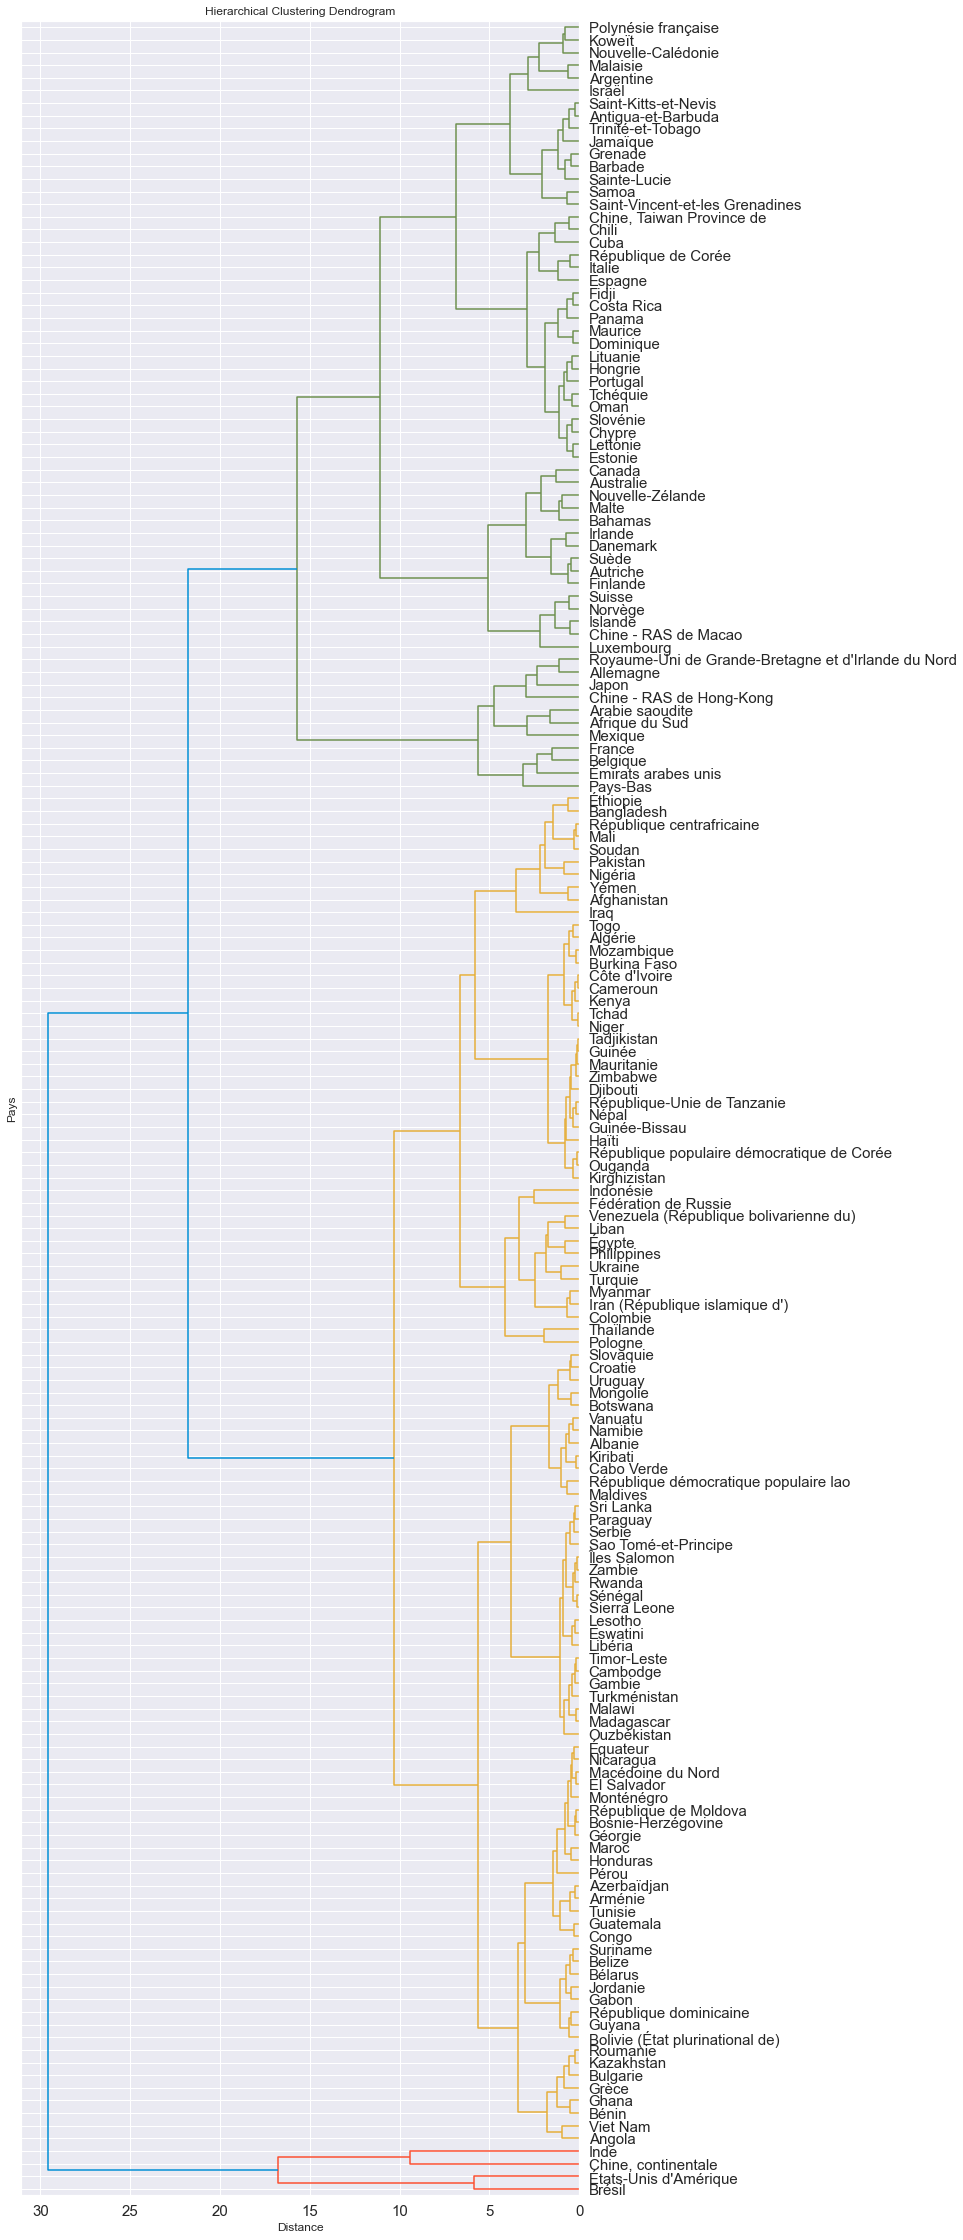

In [12]:
# Nous pouvons désormais afficher le dendrogramme.

# Nous spécifions les labels et l'orientation :

fig, ax = plt.subplots(1, 1, figsize=(10,40))

_ = dendrogram(Z, ax=ax, labels=pays, orientation = "left")

plt.title("Hierarchical Clustering Dendrogram")
ax.set_xlabel("Distance")
ax.set_ylabel("Pays")
plt.style.use("fivethirtyeight")
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

**CLUSTERS**

In [13]:
# Ensuite, on définit selon le degré de précision que nous souhaitons, le nombre k, de clusters que l'on souhaite. 
# En fixant une distance à 10 sur le dendrogramme, on trouve 7 clusters.

k=7

In [14]:
# On applique ensuite la fonction fcluster de scipy pour définir les clusters :

clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([4, 5, 3, 4, 5, 3, 7, 5, 7, 3, 6, 6, 3, 6, 4, 7, 5, 3, 3, 3, 3, 1,
       3, 4, 3, 3, 3, 3, 4, 6, 7, 5, 6, 7, 2, 7, 4, 3, 7, 3, 7, 4, 6, 4,
       7, 3, 7, 7, 3, 7, 6, 5, 4, 3, 3, 3, 7, 3, 3, 4, 4, 3, 3, 4, 3, 7,
       2, 4, 4, 4, 6, 6, 7, 7, 7, 5, 3, 3, 4, 4, 3, 7, 3, 7, 4, 3, 7, 6,
       3, 3, 7, 3, 3, 4, 6, 3, 7, 4, 5, 3, 3, 4, 4, 3, 3, 4, 4, 6, 7, 6,
       4, 7, 4, 3, 4, 7, 3, 5, 4, 4, 7, 7, 3, 3, 5, 3, 4, 7, 3, 3, 3, 4,
       4, 7, 7, 7, 7, 3, 3, 3, 3, 7, 4, 3, 6, 3, 6, 3, 4, 4, 7, 4, 3, 4,
       7, 3, 3, 4, 4, 3, 3, 4, 3, 4, 3, 4, 4, 5, 3, 1, 4, 3], dtype=int32)

**ANALYSE**

In [15]:
# J'affiche les pays pour chaque cluster

dfc = pd.DataFrame({"pays" : pays, "cluster" : clusters})
dfc.head(10)

,pays,cluster
0,Afghanistan,4
1,Afrique du Sud,5
2,Albanie,3
3,Algérie,4
4,Allemagne,5
5,Angola,3
6,Antigua-et-Barbuda,7
7,Arabie saoudite,5
8,Argentine,7
9,Arménie,3


In [16]:
# Effectifs par cluster

effectifs = np.unique(clusters,return_counts = True)
effectifs = pd.DataFrame(effectifs) 
effectifs

,0,1,2,3,4,5,6
0,1,2,3,4,5,6,7
1,2,2,63,44,11,15,35


In [17]:
# J'affiche mes clusters

for i in range(1, 8) : 
    # on fait une selection
    sub_dfc = dfc.loc[dfc.cluster == i]

    # le cluster en question
    print(f"cluster : {i}")

    # on extrait les pays de chaque ligne
    pays_list = sub_dfc.pays.values
   
    # on créé une liste de couple nom/theme
    ziped = zip(pays_list) 
    txt = [f"{n}" for n in ziped]

    # on transforme en str
    txt = " / ".join(txt)
 
    # on print
    print(txt)
    print("\n\n")
    

cluster : 1
('Brésil',) / ("États-Unis d'Amérique",)



cluster : 2
('Chine, continentale',) / ('Inde',)



cluster : 3
('Albanie',) / ('Angola',) / ('Arménie',) / ('Azerbaïdjan',) / ('Belize',) / ('Bolivie (État plurinational de)',) / ('Bosnie-Herzégovine',) / ('Botswana',) / ('Bulgarie',) / ('Bélarus',) / ('Bénin',) / ('Cabo Verde',) / ('Cambodge',) / ('Congo',) / ('Croatie',) / ('El Salvador',) / ('Eswatini',) / ('Gabon',) / ('Gambie',) / ('Ghana',) / ('Grèce',) / ('Guatemala',) / ('Guyana',) / ('Géorgie',) / ('Honduras',) / ('Jordanie',) / ('Kazakhstan',) / ('Kiribati',) / ('Lesotho',) / ('Libéria',) / ('Macédoine du Nord',) / ('Madagascar',) / ('Malawi',) / ('Maldives',) / ('Maroc',) / ('Mongolie',) / ('Monténégro',) / ('Namibie',) / ('Nicaragua',) / ('Ouzbékistan',) / ('Paraguay',) / ('Pérou',) / ('Roumanie',) / ('Rwanda',) / ('République de Moldova',) / ('République dominicaine',) / ('République démocratique populaire lao',) / ('Sao Tomé-et-Principe',) / ('Serbie',) / ('Sierra L

>Je retrouve les pays qui sont apparus sur le négatif de F2 (et qui m'interessaient) dans le cluster 6.

#### Il s'agit maintenant de savoir quels éléments sont les plus représentatifs par cluster.

In [18]:
# Je fusionne les dataframe dfc et df

df2 = pd.merge(df, dfc, left_on = 'Zone', right_on = 'pays')

# Je supprime la variable pays qui fait doublon avec la variable Zone
df2.drop(['pays'], axis = 1, inplace = True)

# je remplace l'index numérique par les pays (la zone)
df2 = df2.set_index('Zone')
df2.head()

,Dispo alim (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,population,PIB_par_habitant,Stabilite_politique,cluster
Zone,,,,,,,,,
Afghanistan,1.53,57.0,132.185185,29.0,28.0,36296.113,520.616409,-2.80,4
Afrique du Sud,35.69,2118.0,63.000000,514.0,1667.0,57009.756,6121.876572,-0.28,5
Albanie,16.36,47.0,0.000000,38.0,13.0,2884.169,4514.204908,0.38,3
Algérie,6.38,277.0,0.000000,2.0,275.0,41389.189,4109.696001,-0.92,4
Allemagne,19.47,1739.0,646.000000,842.0,1514.0,82658.409,44651.829102,0.59,5


In [19]:
# Je réalise un pivot afin d'afficher pour chaque cluster, la moyenne de chaque utilisation/élément
# Ce qui me permet d'avoir une vue globale des caractéristiques de mes clusters

df_moyenne = df2.pivot_table(index = 'cluster', aggfunc = 'mean').round(2)
df_moyenne

,Dispo alim (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB_par_habitant,Production,Stabilite_politique,population
cluster,,,,,,,,
1,51.86,14124.00,3957.50,63.00,34925.18,18057.50,-0.09,266459.29
2,7.28,10911.00,290.00,226.00,5311.76,10890.50,-0.41,1379849.29
3,14.31,176.00,36.28,41.65,4821.01,166.01,0.01,10492.91
4,8.68,560.23,112.34,40.00,2884.41,603.28,-1.17,53074.92
5,30.39,1540.82,402.64,699.09,34460.98,1314.55,0.31,54714.00
6,27.85,256.87,47.35,50.87,60738.21,256.07,1.16,7790.75
7,37.80,333.03,53.51,56.69,17552.68,329.51,0.57,10317.14


### Synthèse des clusters

>Cluster 1 : pays producteurs et exportateurs, gros consommateurs de poulets (n'ont pas besoin d'importer).

>Cluster 2 : pays très peuplés et pauvres, producteurs, consomment peu de poulet (130g par semaine).

>Cluster 3 : pays peu peuplés, pauvres, peu d'exportation et d'importation.

>Cluster 4 : pays très pauvres, mauvaise stabilité politique, consomment peu de poulet.

>Cluster 5 : pays riches, stabilité politique correcte, petits producteurs, exportent et importent de la viande de poulet, consomment en moyenne 560g de poulet par semaine et par personne => cluster interessant, mais il y aura de la concurrence. 

>Cluster 6 : pays riches ++, très peu producteurs, peu peuplés, très bonne stabilité politique. Consomment en moyenne 515g de poulet par semaine (environ 4 fois par semaine) -> groupement interessant.

>Cluster 7 : pays gros consommateurs de poulet (700g par semaine), pas très riches, petite population. Beaucoup d'îles dans ce cluster => groupement interessant également

#### Regardons comment sont représentées les variables au sein de chaque cluster

#### 1. Disponibilité alimentaire (kg/personne/an)

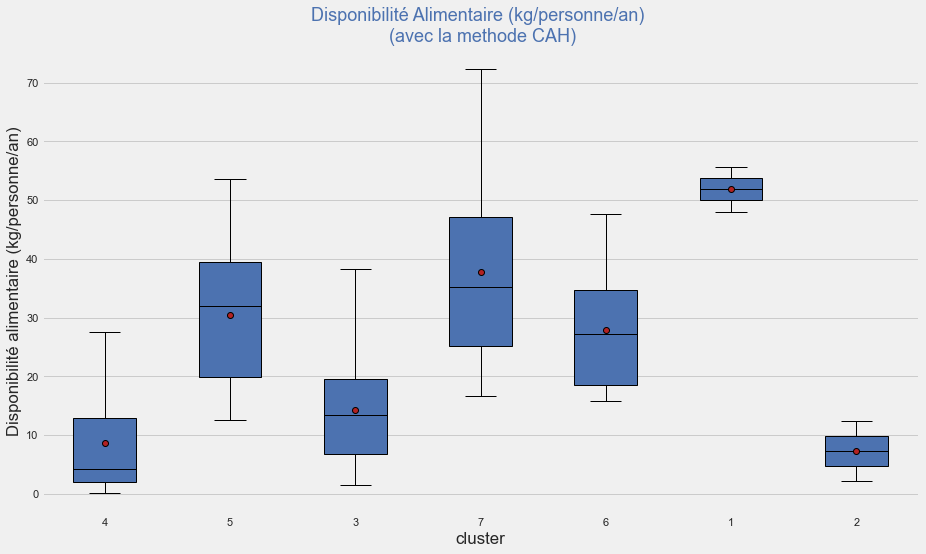

In [20]:
# Comparons les distributions de la variable "disponibilité alimentaire (kg/personne/an)"

C = "cluster"
V = "Dispo alim (kg/personne/an)" 

plt.figure(figsize = (14,8))
plt.title("Disponibilité Alimentaire (kg/personne/an) \n (avec la methode CAH)", fontsize=18,color='b')
modalites = df2[C].unique()
groupes = []
for m in modalites:
    groupes.append(df2[df2[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Disponibilité alimentaire (kg/personne/an)")
plt.show()

#### 2. Disponibilité intérieure (en milliers de tonnes)

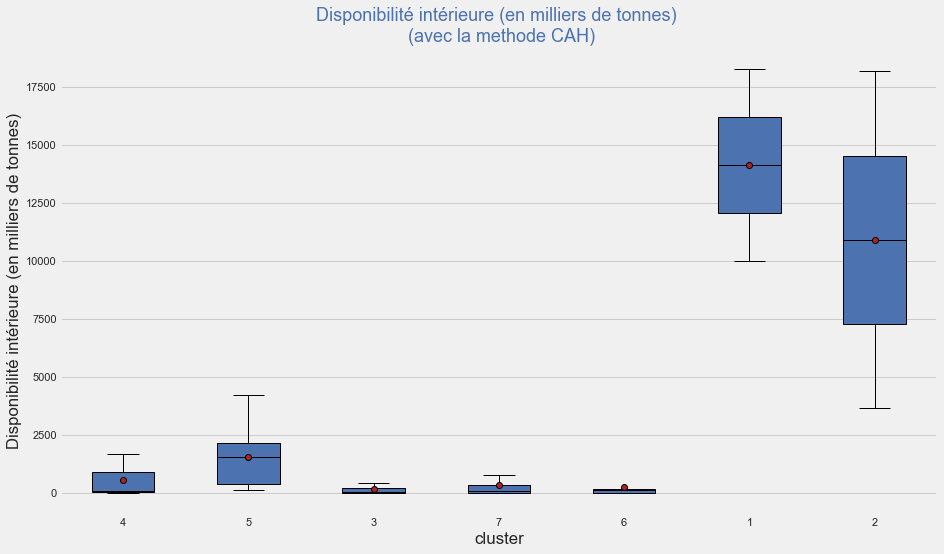

In [21]:
# Comparons les distributions de la variable "Disponibilité intérieure"

C = "cluster"
V = "Disponibilité intérieure" 

plt.figure(figsize = (14,8))
plt.title("Disponibilité intérieure (en milliers de tonnes) \n (avec la methode CAH)", fontsize=18,color='b')
modalites = df2[C].unique()
groupes = []
for m in modalites:
    groupes.append(df2[df2[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Disponibilité intérieure (en milliers de tonnes)")
plt.show()

#### 3. Exportations (en milliers de tonnes)

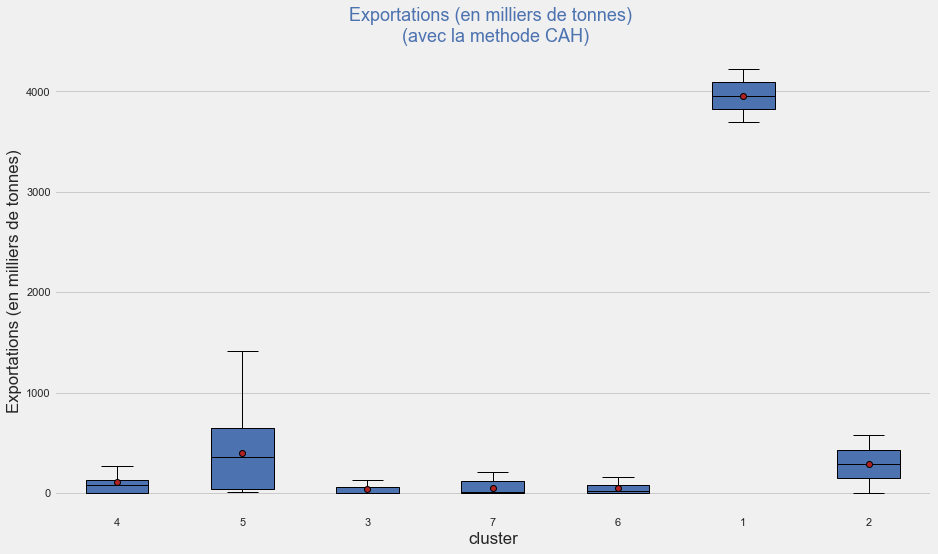

In [22]:
# Comparons les distributions de la variable "Exportations"

C = "cluster"
V = "Exportations - Quantité" 

plt.figure(figsize = (14,8))
plt.title("Exportations (en milliers de tonnes) \n (avec la methode CAH)", fontsize=18,color='b')
modalites = df2[C].unique()
groupes = []
for m in modalites:
    groupes.append(df2[df2[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Exportations (en milliers de tonnes)")
plt.show()

#### 4. Importations (en milliers de tonnes)

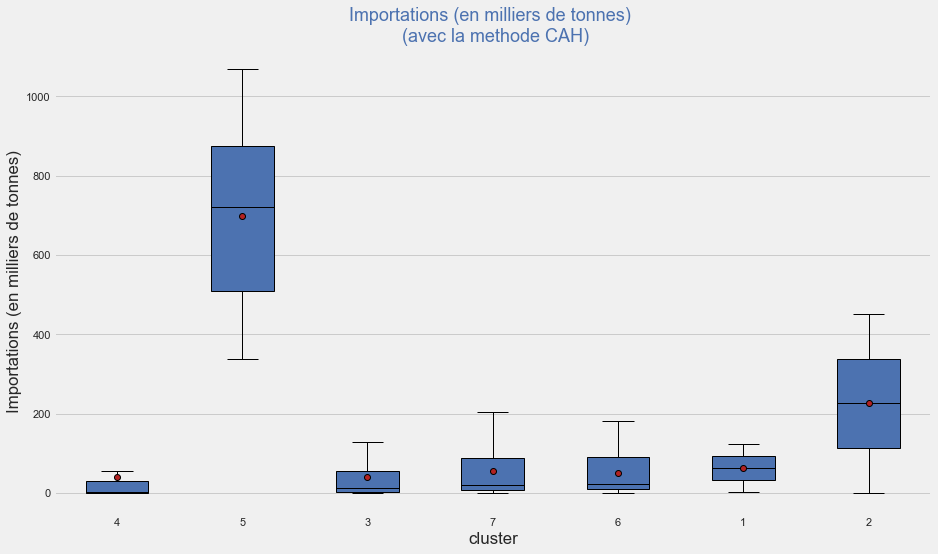

In [23]:
# Comparons les distributions de la variable "Importations"

C = "cluster"
V = "Importations - Quantité" 

plt.figure(figsize = (14,8))
plt.title("Importations (en milliers de tonnes) \n (avec la methode CAH)", fontsize=18,color='b')
modalites = df2[C].unique()
groupes = []
for m in modalites:
    groupes.append(df2[df2[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Importations (en milliers de tonnes)")
plt.show()

#### 5. PIB_par_habitant (en dollars américain)

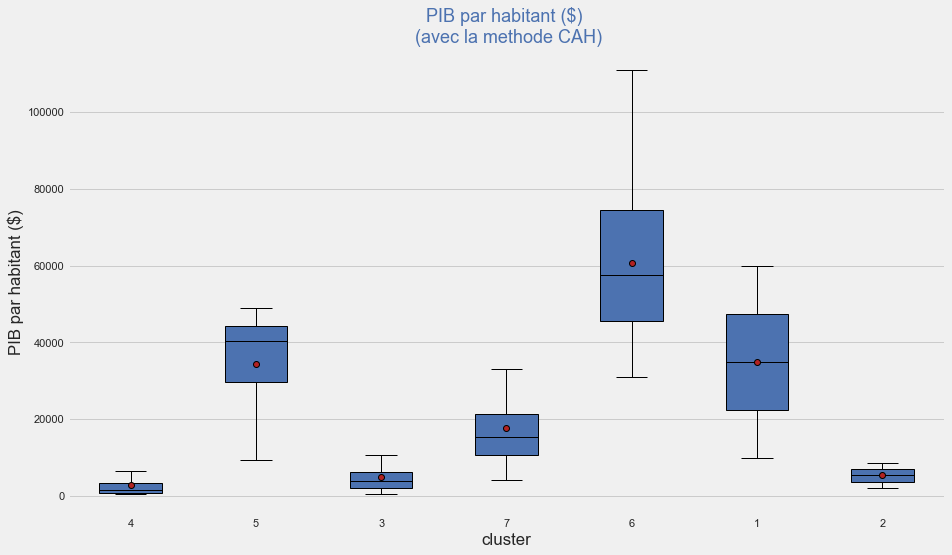

In [24]:
# Comparons les distributions de la variable "PIB_par_habitant"

C = "cluster"
V = "PIB_par_habitant" 

plt.figure(figsize = (14,8))
plt.title("PIB par habitant ($) \n (avec la methode CAH)", fontsize=18,color='b')
modalites = df2[C].unique()
groupes = []
for m in modalites:
    groupes.append(df2[df2[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("PIB par habitant ($)")
plt.show()

#### 6. Production (en milliers de tonnes)

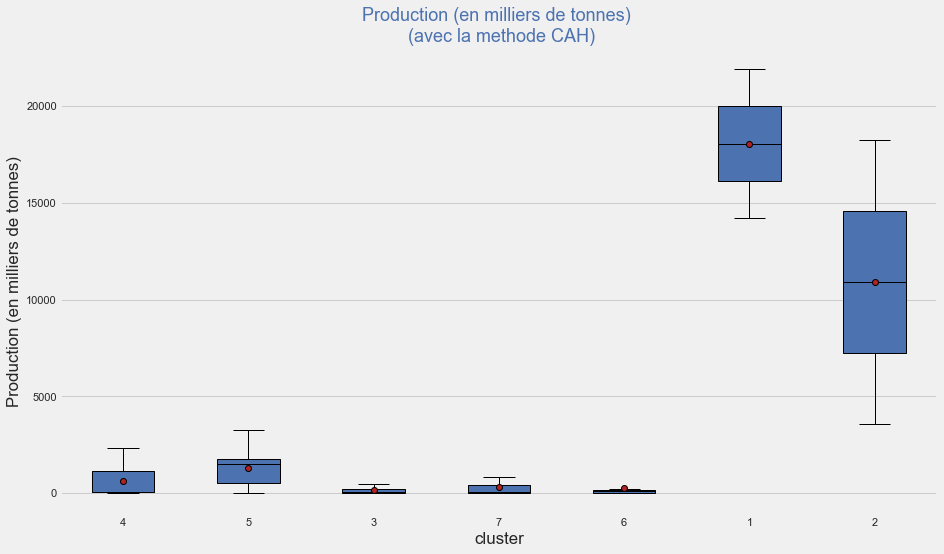

In [25]:
# Comparons les distributions de la variable "Production"

C = "cluster"
V = "Production" 

plt.figure(figsize = (14,8))
plt.title("Production (en milliers de tonnes) \n (avec la methode CAH)", fontsize=18,color='b')
modalites = df2[C].unique()
groupes = []
for m in modalites:
    groupes.append(df2[df2[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Production (en milliers de tonnes)")
plt.show()

#### 7. Stabilité politique

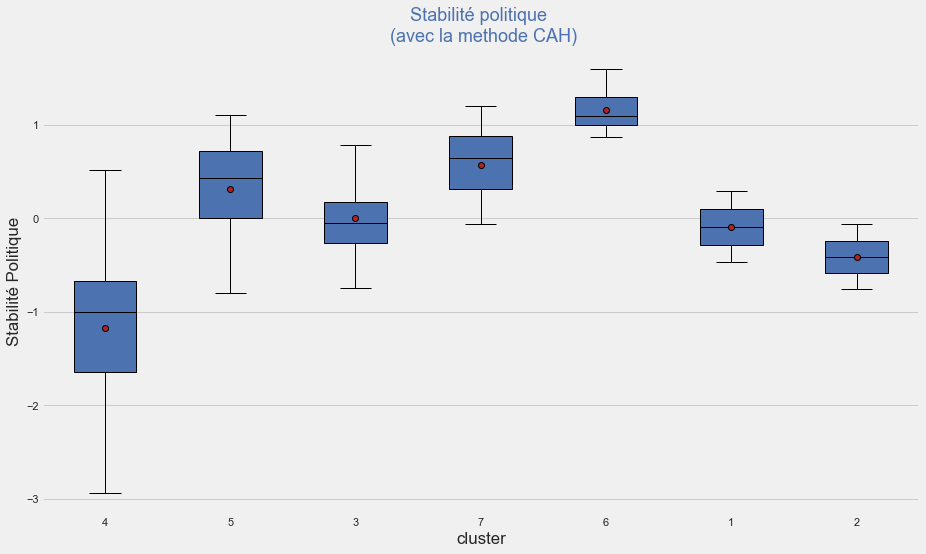

In [26]:
# Comparons les distributions de la variable "Stabilite_politique"

C = "cluster"
V = "Stabilite_politique" 

plt.figure(figsize = (14,8))
plt.title("Stabilité politique \n (avec la methode CAH)", fontsize=18,color='b')
modalites = df2[C].unique()
groupes = []
for m in modalites:
    groupes.append(df2[df2[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Stabilité Politique")
plt.show()

#### 8. Population ((en milliers d'habitants)

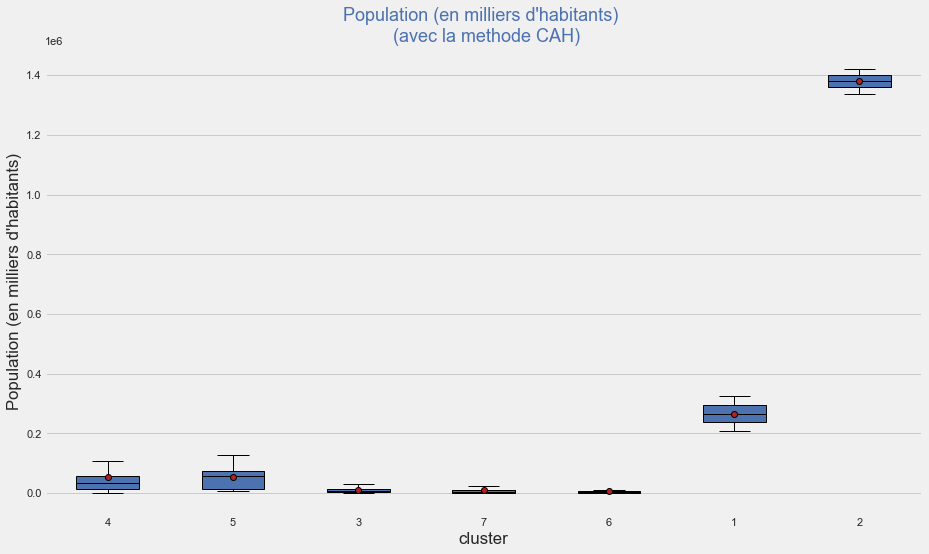

In [27]:
# Comparons les distributions de la variable "Population"

C = "cluster"
V = "population" 

plt.figure(figsize = (14,8))
plt.title("Population (en milliers d'habitants) \n (avec la methode CAH)", fontsize=18,color='b')
modalites = df2[C].unique()
groupes = []
for m in modalites:
    groupes.append(df2[df2[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Population (en milliers d'habitants)")
plt.show()

### METHODE DES K-MEANS<a class="anchor" id="K_Means"></a>

In [28]:
# Je retrouve mes données standardisées, auxquelles je réattribue l'index 'pays' et le nom des variables

df_X_scaled = pd.DataFrame(X_scaled, index = pays, columns = ["Dispo alim (kg/personne/an)","Disponibilité intérieure","Exportations - Quantité","Importations - Quantité","Production","population","PIB_par_habitant","Stabilite_politique"])
df_X_scaled.head()

,Dispo alim (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,population,PIB_par_habitant,Stabilite_politique
Afghanistan,-1.181435,-0.290861,0.000000,-0.327124,-0.282855,-0.042889,-0.700957,-3.072377
Afrique du Sud,0.978658,0.659773,-0.152561,2.294003,0.382099,0.092833,-0.410631,-0.242348
Albanie,-0.243666,-0.295473,-0.291483,-0.278485,-0.288941,-0.261814,-0.493960,0.498850
Algérie,-0.874747,-0.189386,-0.291483,-0.473043,-0.182646,-0.009518,-0.514927,-0.961085
Allemagne,-0.047007,0.484960,1.133020,4.066642,0.320026,0.260891,1.586463,0.734686


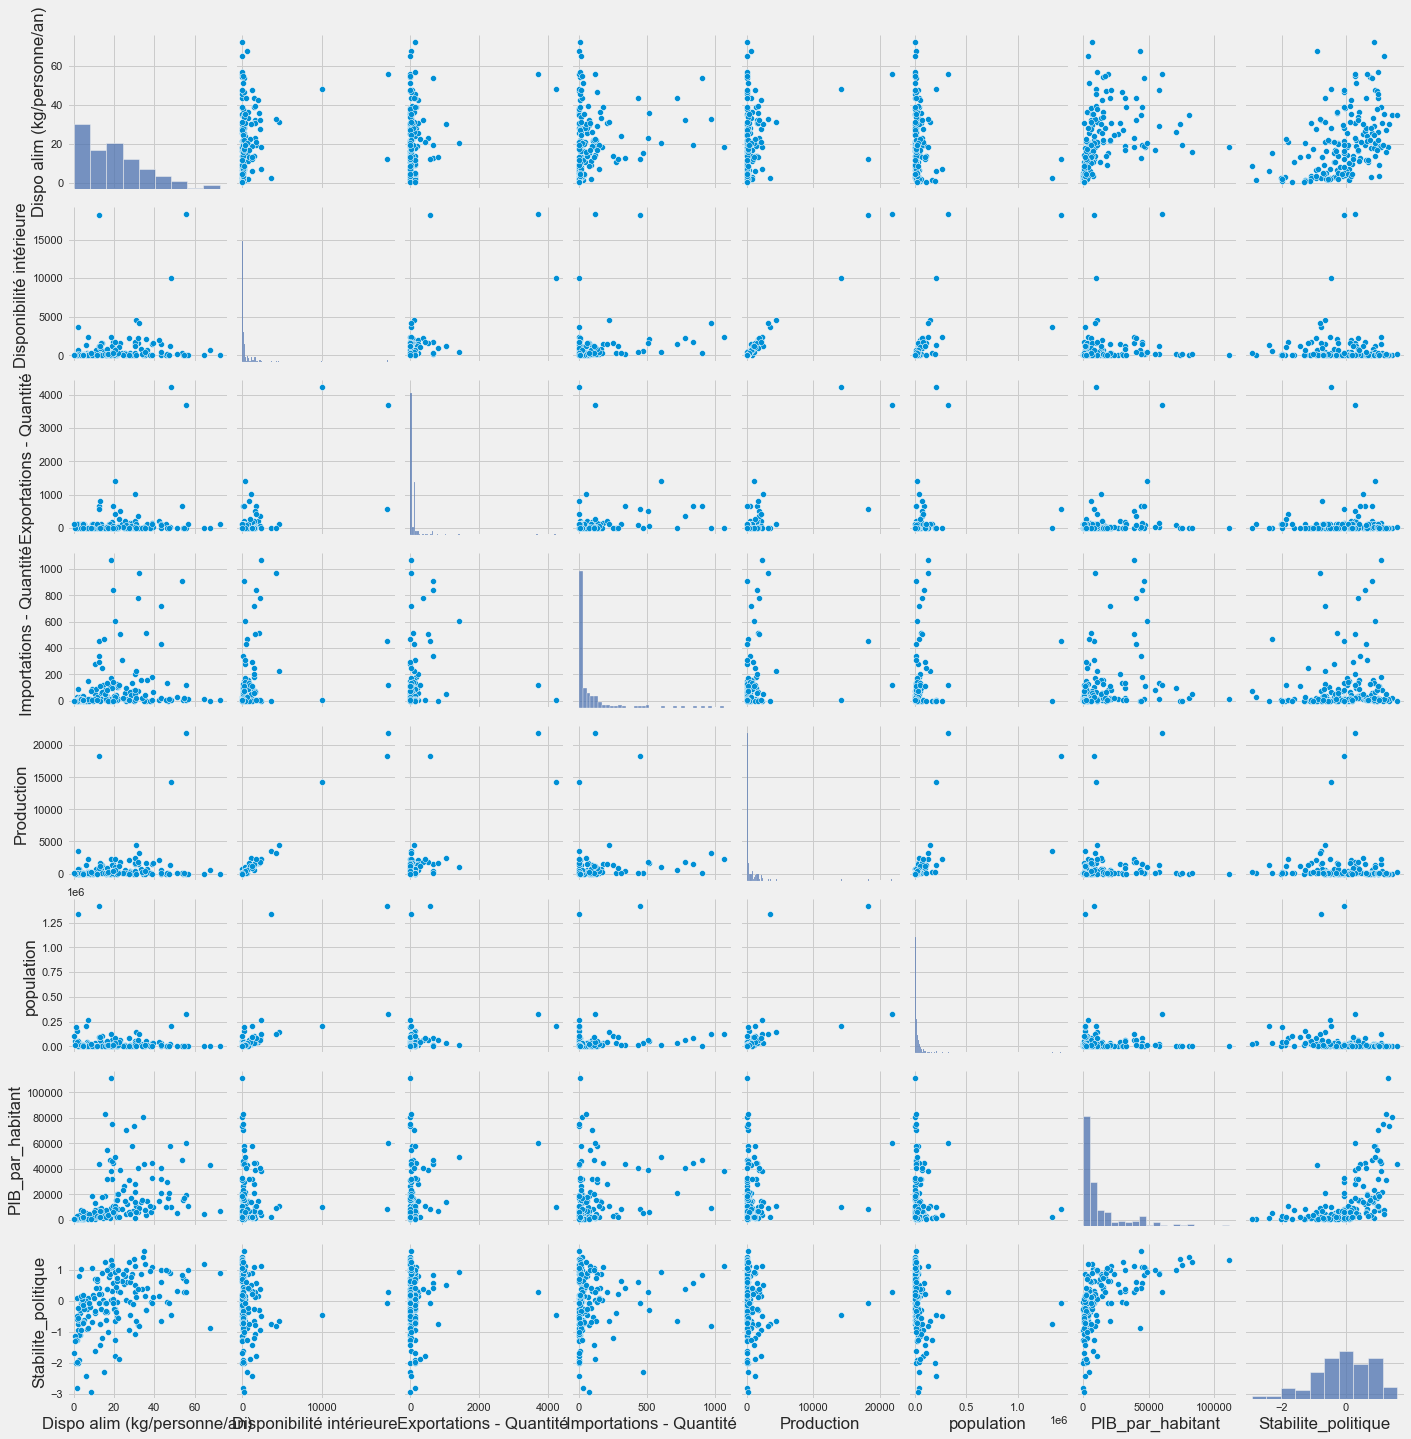

In [29]:
# Visuellement, on peut voir les variables qui sont liées entre elles sur mon dataframe original (les graphiques seront
# identiques avec les données centrées réduites, ce sont juste les mesures qui changeront)

sns.pairplot(df)
plt.show()

>On peut voir, par exemple, que plus la production augmente, plus la disponibilité intérieure augmente.

>Egalement, plus le PIB par habitant augmente, plus la stabilité politique est bonne => on peut dire qu'il y a une meilleure
stabilité politique dans les pays riches. 

>Egalement, plus la stabilité politique est bonne, plus la disponibilité alimentaire est élevée (car plus le PIB est élevé aussi)

In [30]:
# On instancie notre Kmeans avec 7 clusters : 
kmeans = KMeans(n_clusters=7)

# On l'entraine : 
kmeans.fit(df_X_scaled)

KMeans(n_clusters=7)

In [31]:
# Calcul de son inertie

round(kmeans.inertia_,2)

306.66

In [32]:
# On peut stocker nos clusters dans une variable labels : 
labels = kmeans.labels_
labels

array([3, 5, 0, 3, 5, 0, 6, 5, 6, 0, 2, 2, 3, 6, 3, 6, 2, 0, 6, 0, 0, 1,
       0, 3, 0, 0, 0, 0, 3, 2, 6, 5, 2, 6, 4, 6, 0, 0, 6, 0, 0, 3, 2, 3,
       6, 0, 6, 0, 0, 6, 2, 5, 0, 0, 0, 0, 6, 0, 0, 3, 3, 6, 0, 3, 0, 6,
       4, 3, 3, 3, 2, 2, 6, 0, 6, 5, 0, 0, 3, 0, 0, 6, 0, 0, 3, 0, 6, 2,
       0, 0, 6, 0, 0, 3, 6, 0, 6, 3, 5, 0, 0, 3, 3, 0, 0, 3, 3, 2, 6, 2,
       3, 0, 3, 0, 3, 6, 0, 5, 3, 6, 6, 6, 0, 0, 5, 0, 3, 0, 0, 6, 0, 3,
       3, 6, 6, 6, 6, 0, 0, 0, 0, 6, 3, 0, 2, 6, 2, 0, 3, 3, 6, 3, 0, 3,
       6, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 3, 5, 0, 1, 3, 0])

In [33]:
# Effectifs par cluster

np.unique(kmeans.labels_,return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([66,  2, 14, 42,  2, 10, 36], dtype=int64))

In [34]:
# Je rajoute la variable contenant le numéro de cluster au dataframe original

df3 = df.copy()
df3['cluster'] = kmeans.labels_
df3 = df3.set_index('Zone')
df3.head()

,Dispo alim (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,population,PIB_par_habitant,Stabilite_politique,cluster
Zone,,,,,,,,,
Afghanistan,1.53,57.0,132.185185,29.0,28.0,36296.113,520.616409,-2.80,3
Afrique du Sud,35.69,2118.0,63.000000,514.0,1667.0,57009.756,6121.876572,-0.28,5
Albanie,16.36,47.0,0.000000,38.0,13.0,2884.169,4514.204908,0.38,0
Algérie,6.38,277.0,0.000000,2.0,275.0,41389.189,4109.696001,-0.92,3
Allemagne,19.47,1739.0,646.000000,842.0,1514.0,82658.409,44651.829102,0.59,5


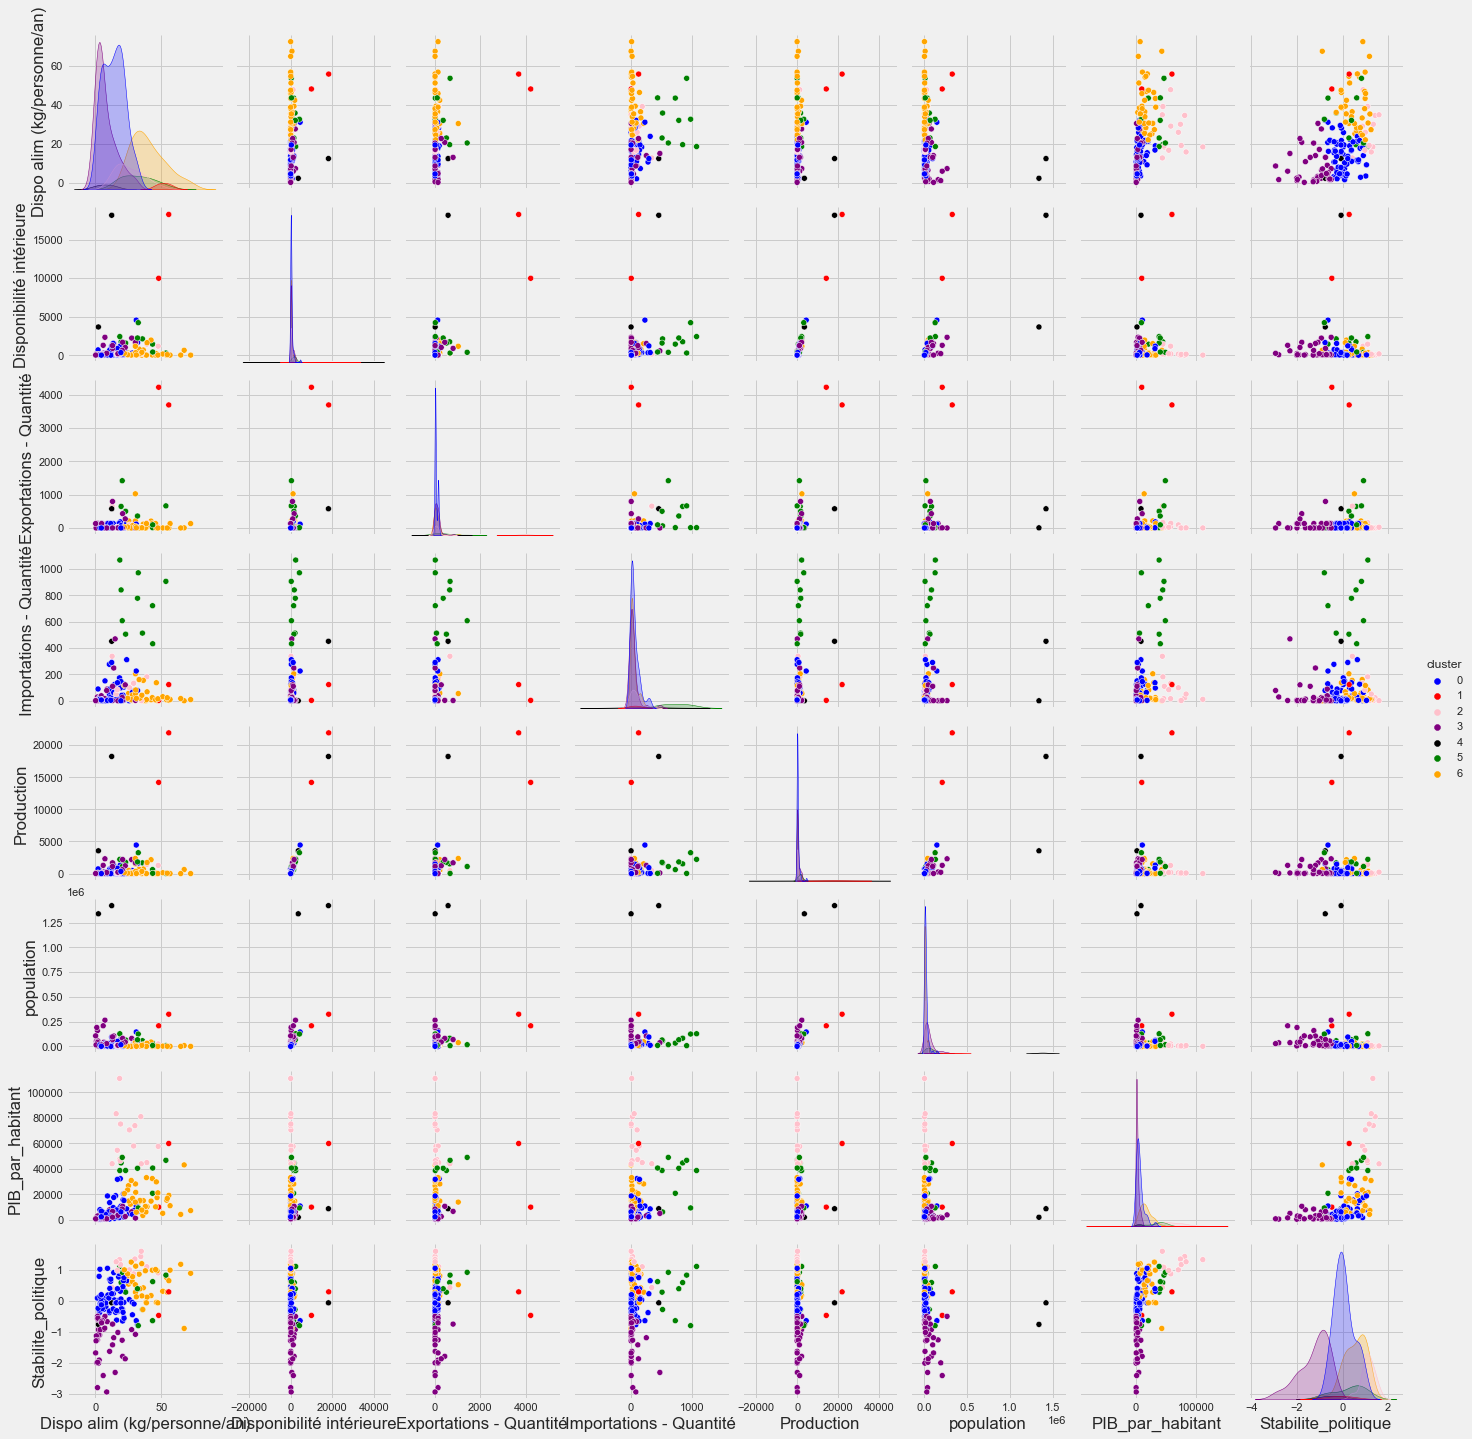

In [35]:
# Voyons ce que cela donne au niveau graphique ; on reprend les mêmes données et on colorie par cluster.
# Configuration des points dans le plan par paires de variables

sns.pairplot(df3, hue = 'cluster', palette = {0:'blue',1:'red',2:'pink',3:'purple',4:'black',5:'green',6:'orange'})
plt.show()

In [36]:
# J'affiche les moyennes par cluster afin d'avoir une première idée des groupes

df3_moyenne = df3.pivot_table(index = 'cluster', aggfunc = 'mean').round(2)
df3_moyenne

,Dispo alim (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB_par_habitant,Production,Stabilite_politique,population
cluster,,,,,,,,
0,13.94,283.14,41.74,54.56,6292.63,264.93,0.06,14369.67
1,51.86,14124.00,3957.50,63.00,34925.18,18057.50,-0.09,266459.29
2,25.71,283.21,88.14,76.29,63705.20,306.71,1.11,9104.37
3,7.52,418.74,90.60,33.40,2434.18,440.36,-1.24,50428.39
4,7.28,10911.00,290.00,226.00,5311.76,10890.50,-0.41,1379849.29
5,32.17,1679.70,377.30,735.20,33504.49,1399.70,0.30,59043.42
6,40.03,310.00,74.28,38.81,16407.17,349.03,0.54,8107.74


#### Méthode du coude<a class="anchor" id="Methode_du_coude"></a>

In [37]:
inertia = []

In [38]:
k_list = range(1, 8)
list(k_list)

[1, 2, 3, 4, 5, 6, 7]

In [39]:
for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X_scaled) 
  inertia.append(kmeans.inertia_)

In [40]:
inertia

[1376.0,
 919.1133377395512,
 676.2372943421112,
 550.0770311421378,
 431.45064040428105,
 389.26410157930053,
 312.21861728406384]

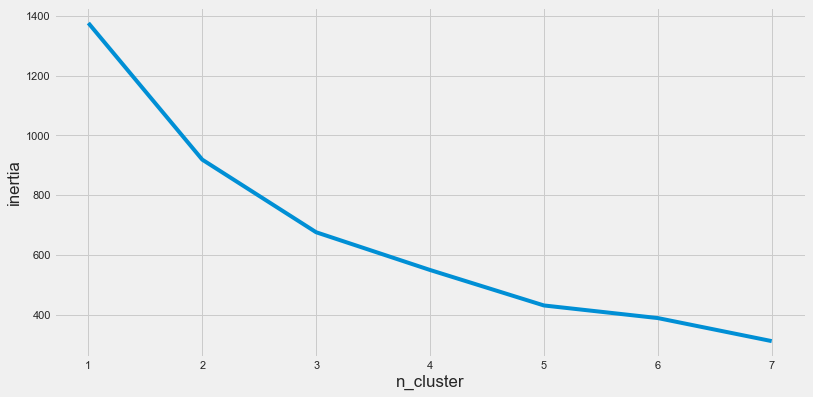

In [41]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("inertia")
ax.set_xlabel("n_cluster")
plt.style.use("fivethirtyeight")
ax = plt.plot(k_list, inertia)

>La méthode du coude nous indique un partitionnement en 2 voir 3 clusters

#### Silhouette Score<a class="anchor" id="Silhouette_score"></a>

In [42]:
# Silhouette Score

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_scaled, kmeans.labels_))

Silhouette Coefficient: 0.351


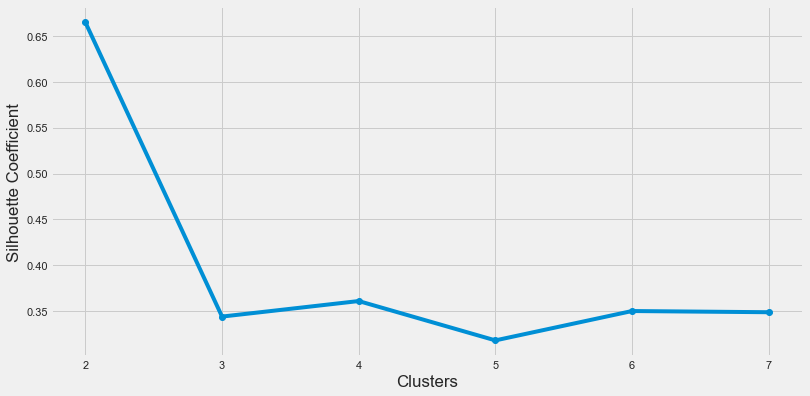

In [43]:
# Version graphique du silhouette score

X_norm = preprocessing.scale(X)

Silhouettes = []
for num_clusters in range (2, 8) :
    cls = cluster.KMeans(n_clusters = num_clusters,
                        n_init = 10, init = 'k-means++', random_state=42, max_iter = 300)
    cls.fit(X_norm)
    silh = metrics.silhouette_score(X_norm, cls.labels_)
    Silhouettes.append(silh)
    
fig, ax = plt.subplots(1,1,figsize=(12,6))    
    
plt.plot(range (2, 8), Silhouettes,marker = 'o')
plt.style.use("fivethirtyeight")
plt.ylabel('Silhouette Coefficient')
plt.xlabel('Clusters')
plt.show()

>Le silhouette score nous donne un partitionnement en 2 clusters. Toutefois, étant donné qe je souhaite un partitionnement plus fin, je vais plutôt tester avec 6 clusters.

In [44]:
# Essayons le KMeans avec 6 clusters

kmeans = KMeans(n_clusters=6)
kmeans.fit(df_X_scaled)

KMeans(n_clusters=6)

In [45]:
# On peut stocker nos clusters dans une variable labels : 

labels = kmeans.labels_
labels

array([0, 3, 0, 0, 3, 0, 5, 3, 5, 0, 1, 1, 0, 5, 0, 5, 1, 5, 5, 0, 0, 4,
       5, 0, 5, 0, 5, 0, 0, 1, 5, 3, 1, 5, 2, 5, 0, 0, 5, 5, 5, 0, 1, 0,
       5, 0, 5, 5, 0, 5, 1, 3, 0, 5, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 5,
       2, 0, 0, 0, 1, 1, 5, 5, 5, 3, 0, 0, 0, 0, 5, 5, 0, 5, 0, 0, 5, 1,
       0, 0, 5, 0, 0, 0, 5, 0, 5, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 1,
       0, 5, 0, 0, 0, 5, 0, 3, 0, 5, 5, 5, 0, 0, 3, 0, 0, 5, 0, 5, 0, 0,
       0, 5, 5, 5, 5, 0, 0, 0, 5, 5, 0, 0, 1, 5, 1, 0, 0, 0, 5, 0, 0, 0,
       5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 3, 0, 4, 0, 0])

In [46]:
# Effectifs par groupe

np.unique(kmeans.labels_,return_counts = True)

(array([0, 1, 2, 3, 4, 5]), array([93, 14,  2, 10,  2, 51], dtype=int64))

In [47]:
# Je rajoute la variable contenant le numéro de groupe au dataframe original

C_bis = df.copy()
C_bis['cluster'] = kmeans.labels_
C_bis = C_bis.set_index('Zone')
C_bis.head()

,Dispo alim (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,population,PIB_par_habitant,Stabilite_politique,cluster
Zone,,,,,,,,,
Afghanistan,1.53,57.0,132.185185,29.0,28.0,36296.113,520.616409,-2.80,0
Afrique du Sud,35.69,2118.0,63.000000,514.0,1667.0,57009.756,6121.876572,-0.28,3
Albanie,16.36,47.0,0.000000,38.0,13.0,2884.169,4514.204908,0.38,0
Algérie,6.38,277.0,0.000000,2.0,275.0,41389.189,4109.696001,-0.92,0
Allemagne,19.47,1739.0,646.000000,842.0,1514.0,82658.409,44651.829102,0.59,3


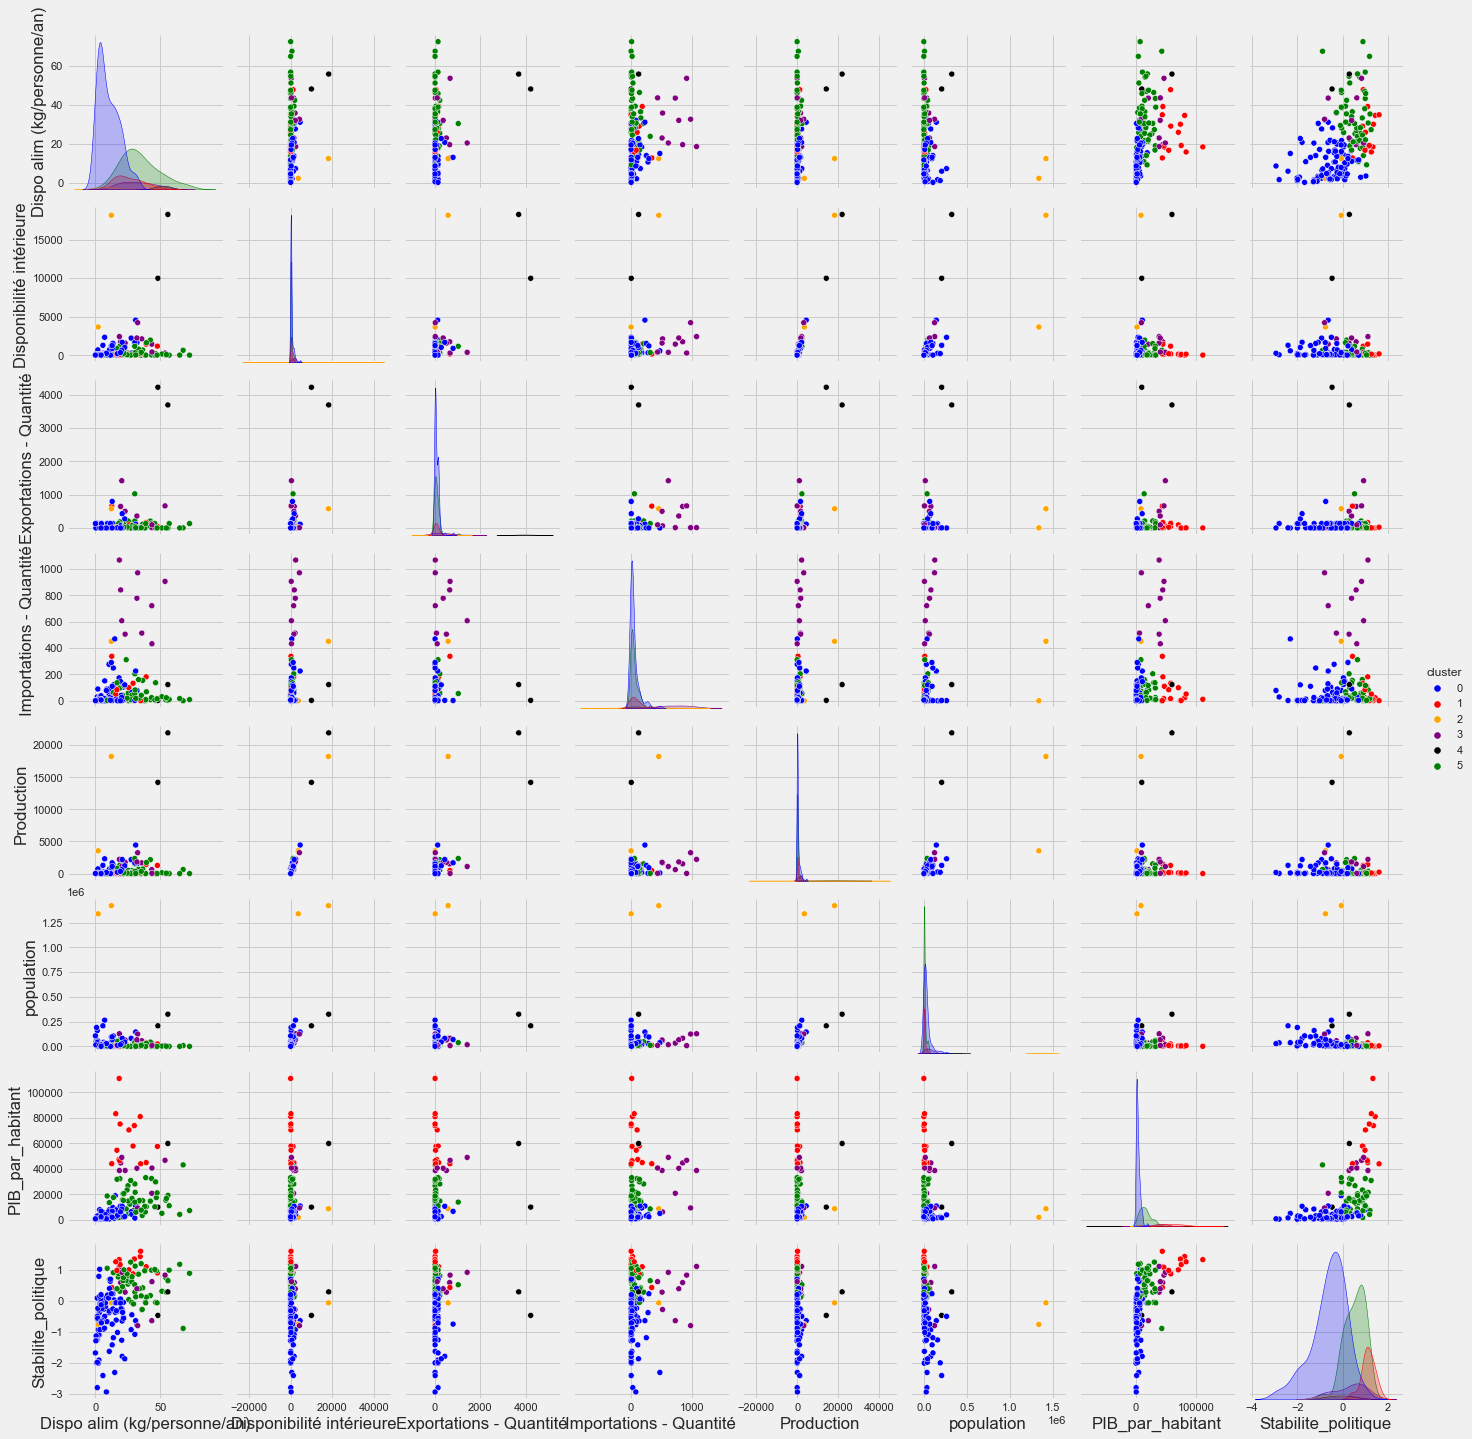

In [48]:
# Configuration des points dans le plan par paires de variables

sns.pairplot(C_bis, hue = 'cluster', palette = {0:'blue',1:'red',2:'orange',3:'purple',4:'black',5:'green'})
plt.show()

#### Voici les clusters que nous obtenons avec la méthode des K-Means

In [49]:
C_ter = C_bis.reset_index()
C_ter.head()

,Zone,Dispo alim (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,population,PIB_par_habitant,Stabilite_politique,cluster
0,Afghanistan,1.53,57.0,132.185185,29.0,28.0,36296.113,520.616409,-2.80,0
1,Afrique du Sud,35.69,2118.0,63.000000,514.0,1667.0,57009.756,6121.876572,-0.28,3
2,Albanie,16.36,47.0,0.000000,38.0,13.0,2884.169,4514.204908,0.38,0
3,Algérie,6.38,277.0,0.000000,2.0,275.0,41389.189,4109.696001,-0.92,0
4,Allemagne,19.47,1739.0,646.000000,842.0,1514.0,82658.409,44651.829102,0.59,3


In [50]:
# J'affiche uniquement le pays et son cluster

C_ter = C_bis.reset_index()
C_ter = C_ter.loc[:,['Zone','cluster']]
C_ter.head()

,Zone,cluster
0,Afghanistan,0
1,Afrique du Sud,3
2,Albanie,0
3,Algérie,0
4,Allemagne,3


In [51]:
# J'affiche mes clusters

for i in range(0, 6) : 
    # on fait une selection
    sub_C_ter = C_ter.loc[C_ter.cluster == i]

    # le cluster en question
    print(f"cluster : {i}")

    # on extrait les pays de chaque ligne
    pays_list = sub_C_ter.Zone.values
   
    # on créé une liste de couple nom/theme
    ziped = zip(pays_list) 
    txt = [f"{n}" for n in ziped]

    # on transforme en str
    txt = " / ".join(txt)
 
    # on print
    print(txt)
    print("\n\n")
    

cluster : 0
('Afghanistan',) / ('Albanie',) / ('Algérie',) / ('Angola',) / ('Arménie',) / ('Azerbaïdjan',) / ('Bangladesh',) / ('Bosnie-Herzégovine',) / ('Botswana',) / ('Burkina Faso',) / ('Bénin',) / ('Cambodge',) / ('Cameroun',) / ('Colombie',) / ('Congo',) / ("Côte d'Ivoire",) / ('Djibouti',) / ('El Salvador',) / ('Eswatini',) / ('Fédération de Russie',) / ('Gambie',) / ('Ghana',) / ('Grèce',) / ('Guatemala',) / ('Guinée',) / ('Guinée-Bissau',) / ('Géorgie',) / ('Haïti',) / ('Honduras',) / ('Indonésie',) / ("Iran (République islamique d')",) / ('Iraq',) / ('Jordanie',) / ('Kazakhstan',) / ('Kenya',) / ('Kirghizistan',) / ('Lesotho',) / ('Liban',) / ('Libéria',) / ('Macédoine du Nord',) / ('Madagascar',) / ('Malawi',) / ('Maldives',) / ('Mali',) / ('Maroc',) / ('Mauritanie',) / ('Mongolie',) / ('Monténégro',) / ('Mozambique',) / ('Myanmar',) / ('Namibie',) / ('Nicaragua',) / ('Niger',) / ('Nigéria',) / ('Népal',) / ('Ouganda',) / ('Ouzbékistan',) / ('Pakistan',) / ('Paraguay',) / ('

In [52]:
# J'affiche les moyennes par cluster

C_bis_moyenne = C_bis.pivot_table(index = 'cluster', aggfunc = 'mean').round(2)
C_bis_moyenne

,Dispo alim (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB_par_habitant,Production,Stabilite_politique,population
cluster,,,,,,,,
0,10.09,355.25,61.03,42.58,3364.35,354.60,-0.60,31211.10
1,25.71,283.21,88.14,76.29,63705.20,306.71,1.11,9104.37
2,7.28,10911.00,290.00,226.00,5311.76,10890.50,-0.41,1379849.29
3,32.17,1679.70,377.30,735.20,33504.49,1399.70,0.30,59043.42
4,51.86,14124.00,3957.50,63.00,34925.18,18057.50,-0.09,266459.29
5,34.09,282.27,69.77,47.86,15594.57,305.25,0.53,8934.05


### Nous retrouvons des clusters proches de ceux résultant de la CAH

>Un cluster contenant des pays très pauvres, mauvaise stabilité politique, consomment peu de poulet => 2 clusters apparu dans la méthode CAH ont fusionné dans la méthode des K-Means.

>Un cluster contenant des pays riches ++, très peu producteurs, peu peuplés, très bonne stabilité politique => C'est le cluster qui nous interesse. 

>Un cluster contenant des pays très peuplés et pauvres, producteurs, consomment peu de poulet (Chine et Inde).

>Un cluster contenant des pays riches, ayant une stabilité correcte, producteurs, exportent et importent de la viande de poulet, consomment en moyenne 560g de poulet par semaine et par personne. Peu nous interesser, mais il y aura de la concurrence. 

>Un cluster contenant des pays producteurs et exportateurs, gros consommateurs de poulets (Brésil, USA). 

>Un cluster contenant beaucoup d'îles. Pays peu peuplés, pas très riches, peu d'exportations et d'importations.

#### Regardons maintenant comment sont représentées les variables au sein de chaque cluster<a class="anchor" id="representation_variables"></a>

#### 1. Disponibilité alimentaire (en kg/personne/an)

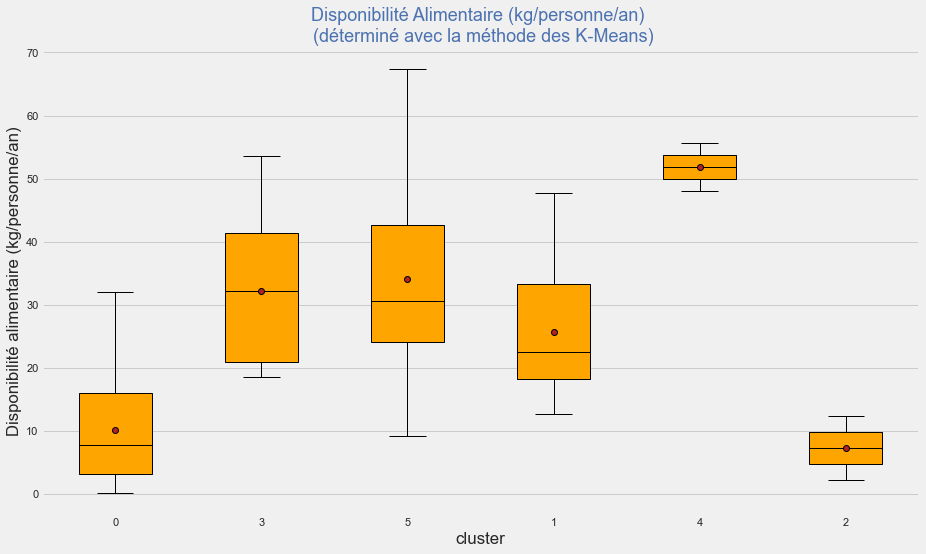

In [53]:
# Comparons les distributions de la variable "disponibilité alimentaire (kg/personne/an)"

C = "cluster"
V = "Dispo alim (kg/personne/an)" 

plt.figure(figsize = (14,8))
plt.title("Disponibilité Alimentaire (kg/personne/an) \n (déterminé avec la méthode des K-Means)", fontsize=18,color='b')
modalites = C_bis[C].unique()
groupes = []
for m in modalites:
    groupes.append(C_bis[C_bis[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
bp = plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
for patch in bp['boxes']:
  patch.set_color('orange')
  patch.set_edgecolor('black')
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Disponibilité alimentaire (kg/personne/an)")
plt.show()

#### 2. Disponibilité inétrieure (en milliers de tonnes)

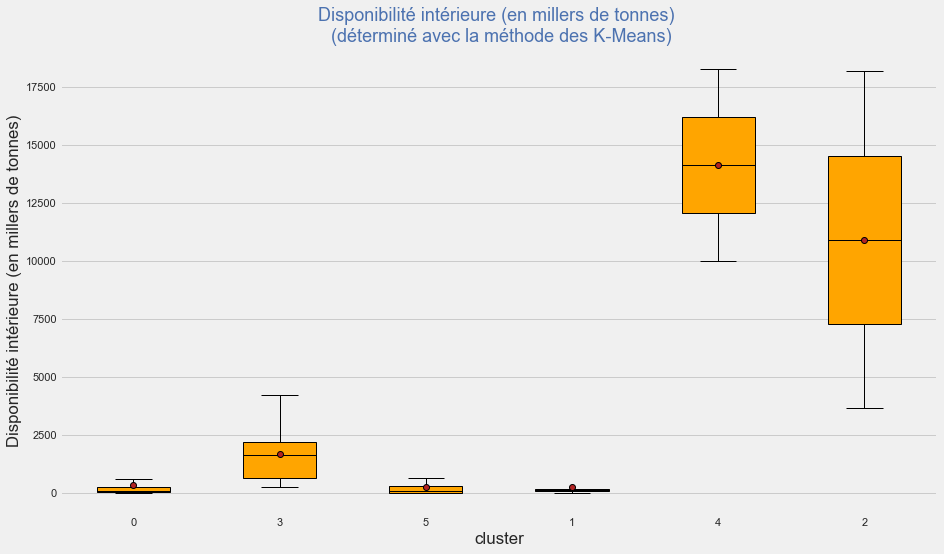

In [54]:
# Comparons les distributions de la variable "Disponibilité intérieure"

C = "cluster"
V = "Disponibilité intérieure" 

plt.figure(figsize = (14,8))
plt.title("Disponibilité intérieure (en millers de tonnes) \n (déterminé avec la méthode des K-Means)", fontsize=18,color='b')
modalites = C_bis[C].unique()
groupes = []
for m in modalites:
    groupes.append(C_bis[C_bis[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
bp = plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
for patch in bp['boxes']:
  patch.set_color('orange')
  patch.set_edgecolor('black')
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Disponibilité intérieure (en millers de tonnes)")
plt.show()

#### 3. Exportations (en milliers de tonnes)

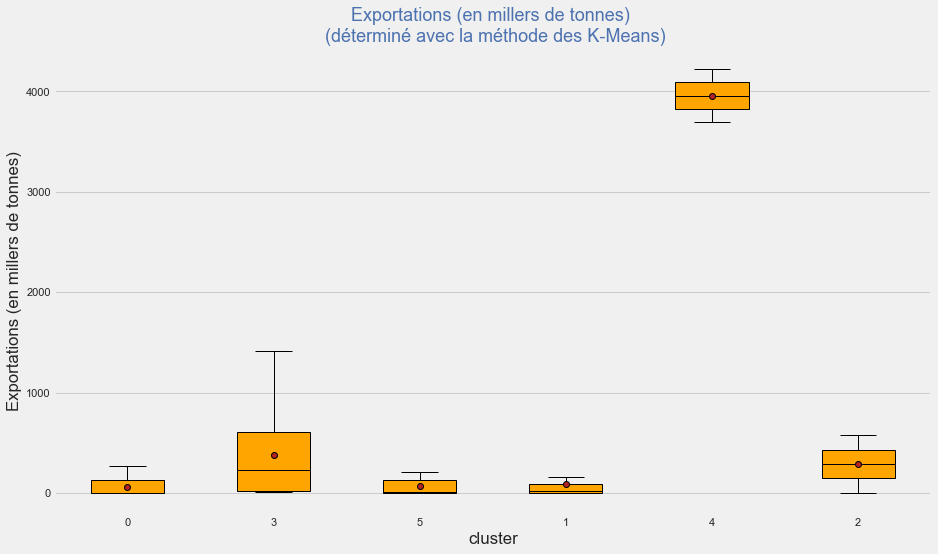

In [55]:
# Comparons les distributions de la variable "Exportations"

C = "cluster"
V = "Exportations - Quantité" 

plt.figure(figsize = (14,8))
plt.title("Exportations (en millers de tonnes) \n (déterminé avec la méthode des K-Means)", fontsize=18,color='b')
modalites = C_bis[C].unique()
groupes = []
for m in modalites:
    groupes.append(C_bis[C_bis[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
bp = plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
for patch in bp['boxes']:
  patch.set_color('orange')
  patch.set_edgecolor('black')
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Exportations (en millers de tonnes)")
plt.show()

#### 4. Importations (en milliers de tonnes)

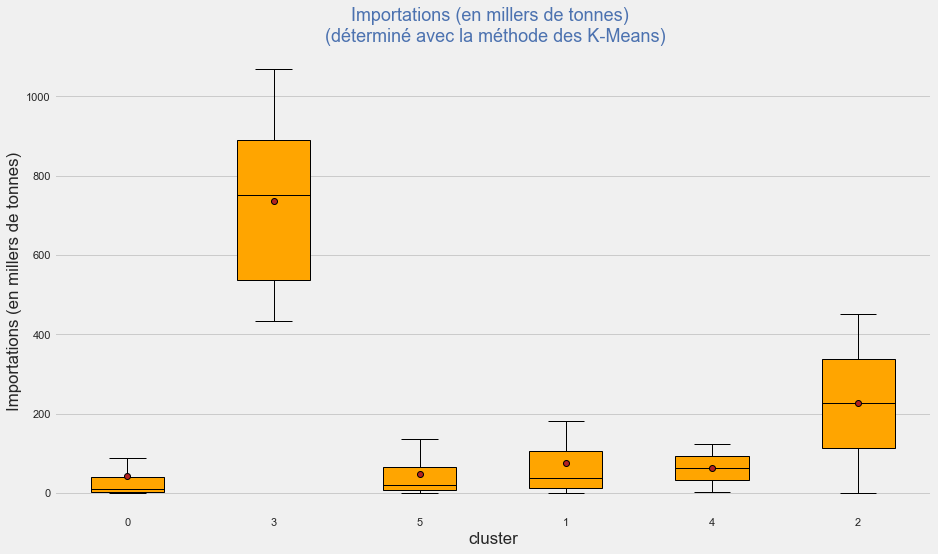

In [56]:
# Comparons les distributions de la variable "Importations"

C = "cluster"
V = "Importations - Quantité" 

plt.figure(figsize = (14,8))
plt.title("Importations (en millers de tonnes) \n (déterminé avec la méthode des K-Means)", fontsize=18,color='b')
modalites = C_bis[C].unique()
groupes = []
for m in modalites:
    groupes.append(C_bis[C_bis[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
bp =plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
for patch in bp['boxes']:
  patch.set_color('orange')
  patch.set_edgecolor('black')
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Importations (en millers de tonnes)")
plt.show()

#### 5. PIB par habitant (en dollars américain)

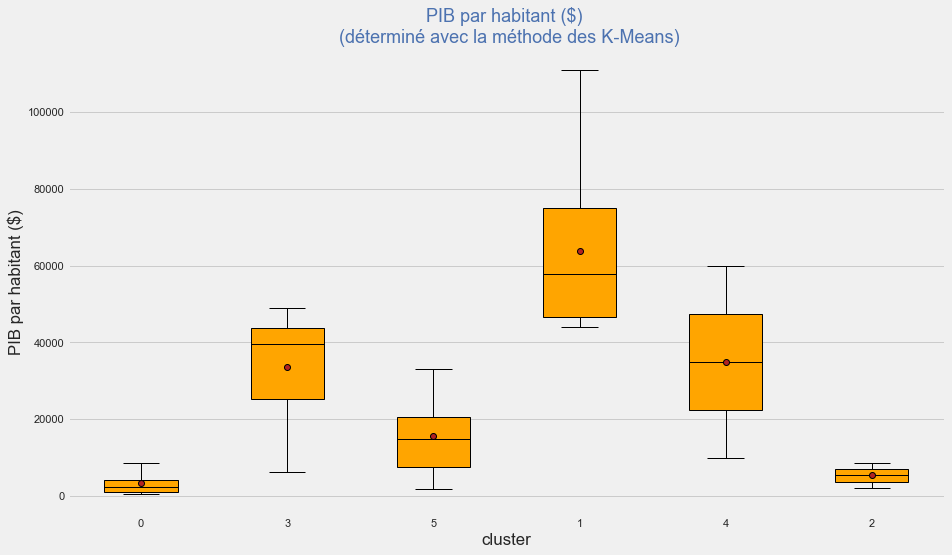

In [57]:
# Comparons les distributions de la variable "PIB_par_habitant"

C = "cluster"
V = "PIB_par_habitant" 

plt.figure(figsize = (14,8))
plt.title("PIB par habitant ($) \n (déterminé avec la méthode des K-Means)", fontsize=18,color='b')
modalites = C_bis[C].unique()
groupes = []
for m in modalites:
    groupes.append(C_bis[C_bis[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
bp = plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
for patch in bp['boxes']:
  patch.set_color('orange')
  patch.set_edgecolor('black')
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("PIB par habitant ($)")
plt.show()

#### 6. Production (en milliers de tonnes)

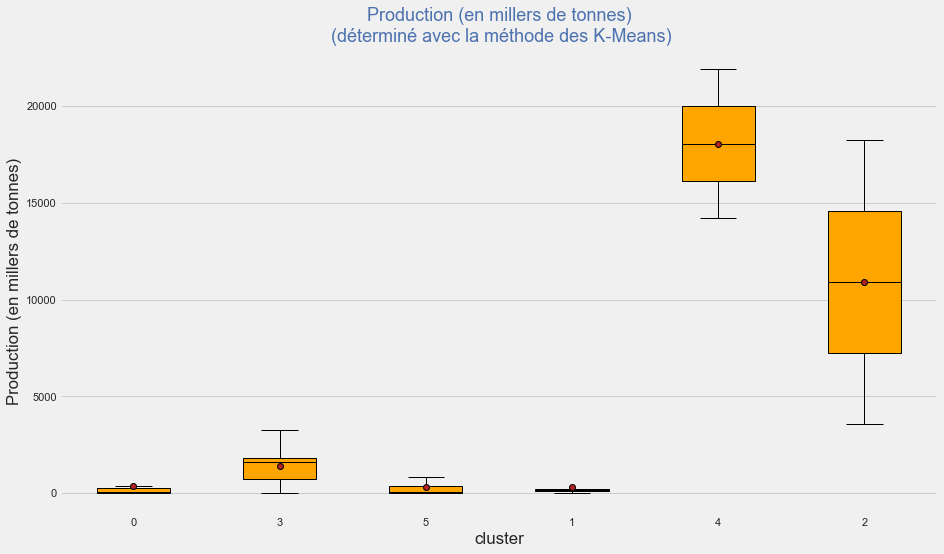

In [58]:
# Comparons les distributions de la variable "Production"

C = "cluster"
V = "Production" 

plt.figure(figsize = (14,8))
plt.title("Production (en millers de tonnes)\n (déterminé avec la méthode des K-Means)", fontsize=18,color='b')
modalites = C_bis[C].unique()
groupes = []
for m in modalites:
    groupes.append(C_bis[C_bis[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
bp = plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
for patch in bp['boxes']:
  patch.set_color('orange')
  patch.set_edgecolor('black')
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Production (en millers de tonnes)")
plt.show()

#### 7. Stabilité politique

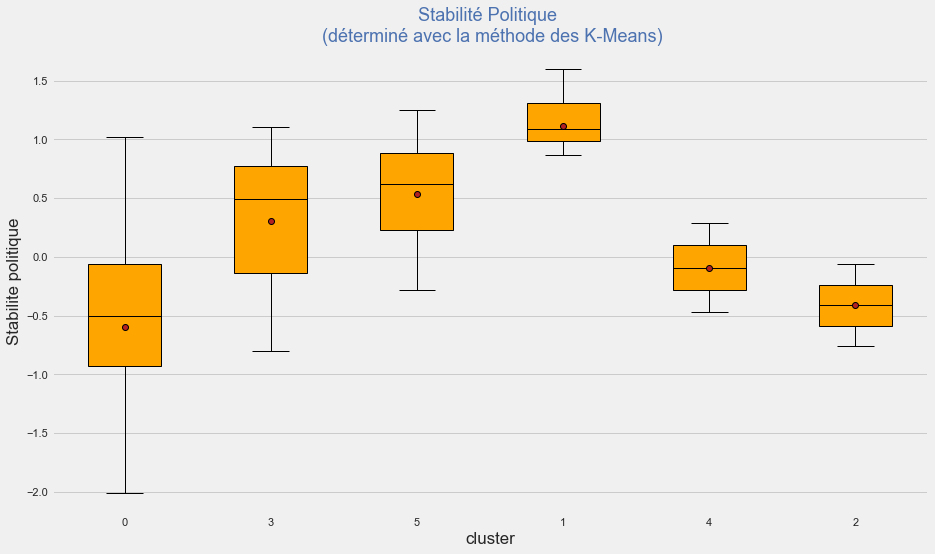

In [59]:
# Comparons les distributions de la variable "Stabilite_politique"

C = "cluster"
V = "Stabilite_politique" 

plt.figure(figsize = (14,8))
plt.title("Stabilité Politique \n (déterminé avec la méthode des K-Means)", fontsize=18,color='b')
modalites = C_bis[C].unique()
groupes = []
for m in modalites:
    groupes.append(C_bis[C_bis[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
bp = plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
for patch in bp['boxes']:
  patch.set_color('orange')
  patch.set_edgecolor('black')
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Stabilite politique")
plt.show()

#### 8. Population (en milliers d'habitants)

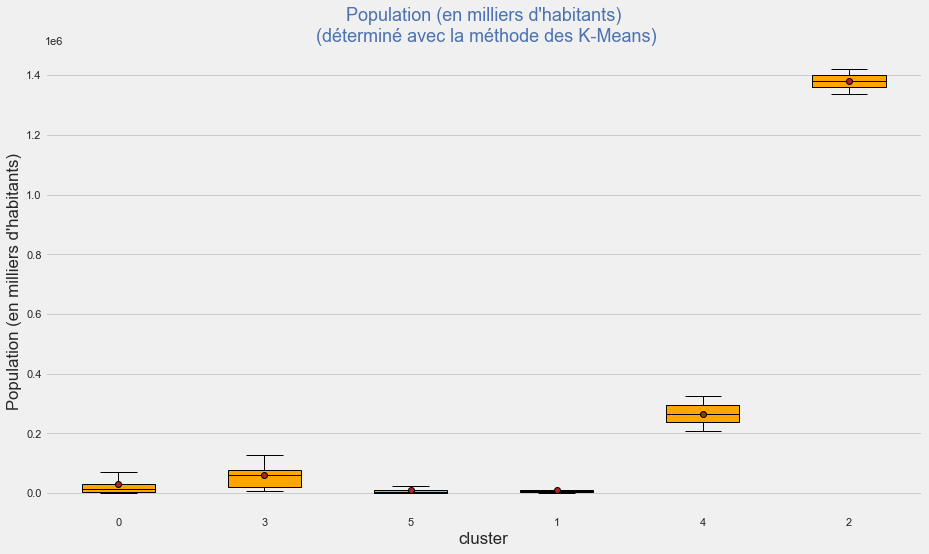

In [60]:
# Comparons les distributions de la variable "Population"

C = "cluster"
V = "population" 

plt.figure(figsize = (14,8))
plt.title("Population (en milliers d'habitants)\n (déterminé avec la méthode des K-Means)", fontsize=18,color='b')
modalites = C_bis[C].unique()
groupes = []
for m in modalites:
    groupes.append(C_bis[C_bis[C]==m][V])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
bp = plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
for patch in bp['boxes']:
  patch.set_color('orange')
  patch.set_edgecolor('black')
plt.grid(axis='x')
plt.xlabel("cluster")
plt.ylabel("Population (en milliers d'habitants)")
plt.show()

#### Centroïdes<a class="anchor" id="Centroides"></a>

In [61]:
# On scale

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
# On reprend notre dataFrame avec nos données scalées

df_X_scaled.head()

,Dispo alim (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,population,PIB_par_habitant,Stabilite_politique
Afghanistan,-1.181435,-0.290861,0.000000,-0.327124,-0.282855,-0.042889,-0.700957,-3.072377
Afrique du Sud,0.978658,0.659773,-0.152561,2.294003,0.382099,0.092833,-0.410631,-0.242348
Albanie,-0.243666,-0.295473,-0.291483,-0.278485,-0.288941,-0.261814,-0.493960,0.498850
Algérie,-0.874747,-0.189386,-0.291483,-0.473043,-0.182646,-0.009518,-0.514927,-0.961085
Allemagne,-0.047007,0.484960,1.133020,4.066642,0.320026,0.260891,1.586463,0.734686


In [63]:
# J'ajoute la variable 'cluster'

df_X_scaled['cluster'] = kmeans.labels_
df_X_scaled

,Dispo alim (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,population,PIB_par_habitant,Stabilite_politique,cluster
Afghanistan,-1.181435,-0.290861,0.000000,-0.327124,-0.282855,-0.042889,-0.700957,-3.072377,0
Afrique du Sud,0.978658,0.659773,-0.152561,2.294003,0.382099,0.092833,-0.410631,-0.242348,3
Albanie,-0.243666,-0.295473,-0.291483,-0.278485,-0.288941,-0.261814,-0.493960,0.498850,0
Algérie,-0.874747,-0.189386,-0.291483,-0.473043,-0.182646,-0.009518,-0.514927,-0.961085,0
Allemagne,-0.047007,0.484960,1.133020,4.066642,0.320026,0.260891,1.586463,0.734686,3
...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1.470623,-0.127118,-0.084203,1.856248,-0.274741,-0.218549,1.378770,0.768377,3
Équateur,-0.057124,-0.159866,-0.291483,-0.483852,-0.156275,-0.170729,-0.405882,-0.006512,0
États-Unis d'Amérique,2.242716,8.108021,7.849794,0.180888,8.596457,1.849341,2.377933,0.397778,4
Éthiopie,-1.269963,-0.310695,0.000000,-0.478447,-0.288535,0.416452,-0.690531,-1.814586,0


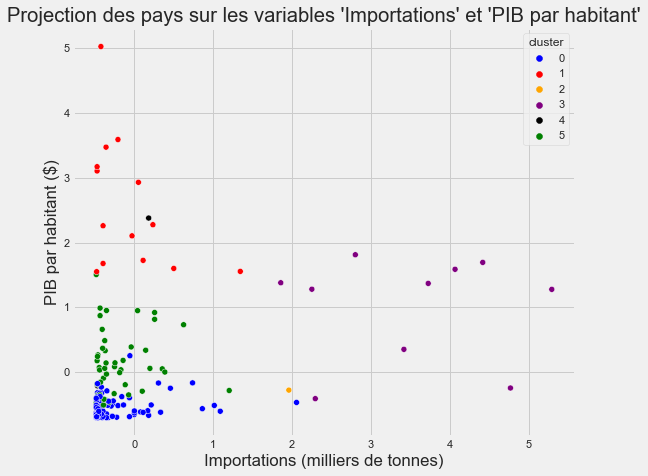

In [64]:
# On peut afficher nos points coloriés en fonction du cluster auquel ils appartiennent

# Je peux projeter mes pays sur les variables 'importations' et 'PIB par habitant'

fig, ax = plt.subplots(1,1, figsize=(8,7))
plt.title("Projection des pays sur les variables 'Importations' et 'PIB par habitant'")
sns.scatterplot(data = df_X_scaled, x = 'Importations - Quantité', y = 'PIB_par_habitant', hue = "cluster",  palette = {0:'blue',1:'red',2:'orange',3:'purple',4:'black',5:'green'})
ax.set_xlabel("Importations (milliers de tonnes)")
ax.set_ylabel("PIB par habitant ($)")
plt.show()

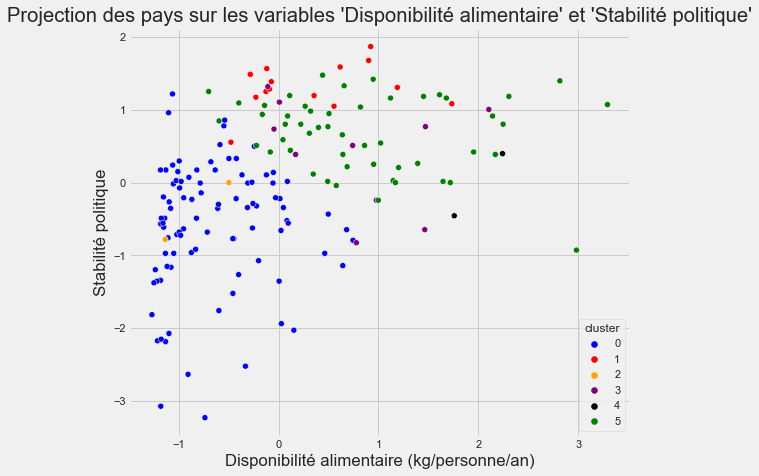

In [65]:
# Je projette mes pays sur les variables 'Stabilité Politique' et 'Disponibilité alimentaire'

fig, ax = plt.subplots(1,1, figsize=(8,7))
plt.title("Projection des pays sur les variables 'Disponibilité alimentaire' et 'Stabilité politique'")
sns.scatterplot(data = df_X_scaled, x = 'Dispo alim (kg/personne/an)', y = 'Stabilite_politique',  hue = "cluster", palette = {0:'blue',1:'red',2:'orange',3:'purple',4:'black',5:'green'})
ax.set_xlabel("Disponibilité alimentaire (kg/personne/an)")
ax.set_ylabel("Stabilité politique")
plt.show()

In [66]:
# On peut stocker nos centroïdes dans une variable 'centroids' : 

centroids = kmeans.cluster_centers_
centroids

array([[-0.64034411, -0.15329369, -0.15691518, -0.25372585, -0.15035146,
        -0.07620755, -0.5535596 , -0.6015959 ],
       [ 0.34780266, -0.18651978, -0.09711832, -0.07157406, -0.16977889,
        -0.22105752,  2.5740418 ,  1.31946206],
       [-0.8181522 ,  4.71553536,  0.34799952,  0.73753978,  4.12414125,
         8.76047753, -0.45262108, -0.39070051],
       [ 0.75600881,  0.45760781,  0.5405059 ,  3.48945327,  0.2736535 ,
         0.10615823,  1.00867136,  0.4112539 ],
       [ 2.00084426,  6.19752828,  8.43525196, -0.14337519,  7.03184616,
         1.46520969,  1.08230866, -0.02897277],
       [ 0.87759398, -0.18695325, -0.1376234 , -0.22518276, -0.17037097,
        -0.22217351,  0.08036017,  0.67064231]])

In [67]:
# On peut maintenant afficher la projection de chaque centroïde sur chaque variable

# On scale
# On utilise bien le scaler déjà entrainé : 

centroids_projection = scaler.fit_transform(centroids)
centroids_projection = pd.DataFrame(centroids_projection, index=["cluster_0", "cluster_1", "cluster_2","cluster_3","cluster_4","cluster_5"], columns = ["Dispo alim (kg/personne/an)","Disponibilité intérieure","Exportations - Quantité","Importations - Quantité","Production","population","PIB_par_habitant","Stabilite_politique"])
centroids_projection

,Dispo alim (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,population,PIB_par_habitant,Stabilite_politique
cluster_0,-1.109770,-0.746844,-0.527814,-0.628591,-0.707650,-0.528378,-1.089314,-1.273678
cluster_1,-0.076172,-0.759501,-0.508635,-0.492700,-0.714616,-0.573093,1.805873,1.668575
cluster_2,-1.295756,1.107810,-0.365866,0.110923,0.825049,2.199529,-0.995876,-0.950675
cluster_3,0.350809,-0.514137,-0.304121,2.163932,-0.555615,-0.472081,0.356826,0.277582
cluster_4,1.652902,1.672337,2.228062,-0.546266,1.867662,-0.052539,0.424992,-0.396660
cluster_5,0.477987,-0.759666,-0.521626,-0.607297,-0.714829,-0.573438,-0.502501,0.674856


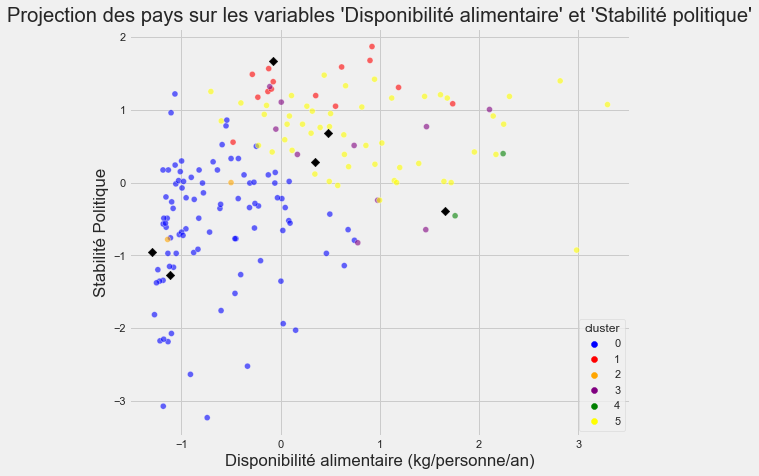

In [68]:
# On affiche le graphique pour les variables Stabilité Politique et Disponibilité alimentaire

# On définit notre figure et son axe : 
fig, ax = plt.subplots(1,1, figsize=(8,7))
plt.title("Projection des pays sur les variables 'Disponibilité alimentaire' et 'Stabilité politique'")

# On affiche nos individus, avec une transparence de 40% (alpha=0.6) : 
sns.scatterplot(data = df_X_scaled, x = 'Dispo alim (kg/personne/an)', y = 'Stabilite_politique', hue = 'cluster', palette = {0:'blue',1:'red',2:'orange',3:'purple',4:'green',5:'yellow'}, alpha =0.6)

# On affiche nos centroides, avec une couleur noire (c="black") et une forme de losange (marker="D") : 
ax.scatter(centroids_projection.iloc[:, 0], centroids_projection.iloc[:, 7],  marker="D", c="black" )

# On spécifie les axes x et y :
ax.set_xlabel("Disponibilité alimentaire (kg/personne/an)")
ax.set_ylabel("Stabilité Politique")
plt.show()

On peut faire la même chose mais au lieu de projeter sur les variables originales, on projette sur les variables synthétiques F1, F2...

In [69]:
pca = PCA(n_components=6)
pca.fit(X_scaled)

PCA(n_components=6)

In [70]:
# on projette nos points dans le "nouvel espace" :

X_proj = pca.transform(X_scaled)
X_proj = pd.DataFrame(X_proj, index = pays, columns = ["F1", "F2", "F3", "F4", "F5", "F6"])
X_proj[:10]

,F1,F2,F3,F4,F5,F6
Afghanistan,-0.820041,2.714028,0.227984,-1.071884,0.387924,1.480114
Afrique du Sud,1.084735,-0.393532,1.716822,-1.191524,-1.088521,-0.287095
Albanie,-0.687210,0.011316,-0.204401,0.207687,-0.057084,-0.620947
Algérie,-0.688397,1.303411,-0.042955,-0.020135,0.267314,0.274190
Allemagne,2.091153,-1.881618,3.111835,-1.373117,1.130196,-0.511165
Angola,-0.390445,0.513447,1.079320,-0.503205,0.098759,-0.377315
Antigua-et-Barbuda,-0.239174,-1.656923,-0.818986,0.086728,-1.571009,0.074949
Arabie saoudite,0.976313,-1.146278,2.744291,-1.827129,-1.125184,0.392323
Argentine,0.869891,-0.617634,-0.828700,-0.004748,-0.986539,0.219694
Arménie,-0.744784,0.692010,-0.107026,-0.243624,-0.127943,0.139123


In [71]:
# On instancie notre Kmeans avec 6 clusters : 
kmeans_pca = KMeans(n_clusters=6)

# On l'entraine : 
kmeans_pca.fit_transform(X_proj)

array([[ 4.32823918,  2.53502512,  5.87852489, 13.84308124, 11.39825047,
         5.69612718],
       [ 2.86287171,  3.21376093,  2.04563682, 12.63042016, 10.4812099 ,
         4.28939314],
       [ 1.28837658,  1.20834836,  4.36846008, 13.51408063, 11.28780543,
         3.24697227],
       ...,
       [14.75510456, 15.15128317, 14.0200514 ,  2.43605457, 12.16599946,
        14.68668909],
       [ 3.41222137,  1.43302066,  5.38167984, 13.6129256 , 10.85657171,
         4.85144145],
       [ 2.04755526,  1.01816625,  4.77913699, 13.68178581, 11.2932496 ,
         3.62995573]])

In [72]:
# On peut stocker nos clusters dans une variable labels : 
label = kmeans_pca.labels_
label

array([1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 5, 5, 1, 0, 1, 0, 5, 0, 0, 1, 1, 3,
       0, 1, 0, 1, 0, 1, 1, 5, 0, 2, 5, 0, 4, 0, 1, 1, 0, 0, 0, 1, 5, 1,
       0, 1, 0, 0, 1, 0, 5, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       4, 1, 1, 1, 5, 5, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 5,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 5, 0, 5,
       1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 5, 0, 5, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1])

In [73]:
# Je rajoute la variable 'cluster' au dataframe

X_proj['cluster'] = label
X_proj.head()

,F1,F2,F3,F4,F5,F6,cluster
Afghanistan,-0.820041,2.714028,0.227984,-1.071884,0.387924,1.480114,1
Afrique du Sud,1.084735,-0.393532,1.716822,-1.191524,-1.088521,-0.287095,2
Albanie,-0.687210,0.011316,-0.204401,0.207687,-0.057084,-0.620947,1
Algérie,-0.688397,1.303411,-0.042955,-0.020135,0.267314,0.274190,1
Allemagne,2.091153,-1.881618,3.111835,-1.373117,1.130196,-0.511165,2


In [74]:
# Je calcule la position de mes centroïdes

centroids = kmeans_pca.cluster_centers_
centroids

array([[-0.14591028, -0.88398901, -0.39269816,  0.11711761, -0.58534258,
        -0.12838042],
       [-0.55472235,  0.95441315, -0.02597827, -0.11843198,  0.16064106,
        -0.01470626],
       [ 1.65906624, -1.70208098,  2.6168707 , -1.38403052,  0.04896692,
        -0.24903441],
       [11.83034928,  0.364869  , -4.22430442, -2.4796494 ,  1.46644481,
        -0.28399684],
       [ 8.06113459,  4.15022445,  2.43919042,  5.10652319, -1.57893671,
         0.04781538],
       [ 0.16058289, -2.41771134,  0.01513046,  0.95658458,  1.09958219,
         0.78510465]])

In [75]:
# On utilise bien le scaler déjà entrainé : 

centroids_proj = scaler.fit_transform(centroids)
centroids_proj = pd.DataFrame(centroids_proj, index=["cluster_0", "cluster_1", "cluster_2","cluster_3","cluster_4","cluster_5"], columns = ["F1", "F2", "F3", "F4","F5","F6"], )
centroids_proj 

,F1,F2,F3,F4,F5,F6
cluster_0,-0.770500,-0.447090,-0.204934,-0.104274,-0.678190,-0.430217
cluster_1,-0.856854,0.407655,-0.042989,-0.202822,0.057975,-0.113712
cluster_2,-0.389233,-0.827454,1.124105,-0.732317,-0.052229,-0.766157
cluster_3,1.759261,0.133553,-1.896988,-1.190697,1.346592,-0.863504
cluster_4,0.963085,1.893514,1.045640,1.983170,-1.658706,0.060369
cluster_5,-0.705759,-1.160179,-0.024835,0.246939,0.984558,2.113221


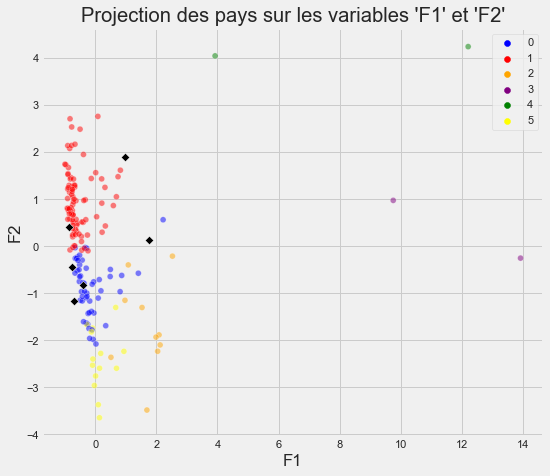

In [76]:
# On affiche le graphique pour F1 et F2 :

# On définit notre figure et son axe : 
fig, ax = plt.subplots(1,1, figsize=(8,7))
plt.title("Projection des pays sur les variables 'F1' et 'F2'")

# On affiche nos individus, avec une transparence de 50% (alpha=0.5) : 
sns.scatterplot(data = X_proj, x = 'F1', y = 'F2', hue = 'cluster', palette = {0:'blue',1:'red',2:'orange',3:'purple',4:'green',5:'yellow'}, alpha =0.5)

# On affiche nos centroides, avec une couleur noire (c="black") et une frome de losange (marker="D") : 
sns.scatterplot(data = centroids_proj, x = 'F1', y = 'F2', marker="D", color ="black" )

# On spécifie les axes x et y :
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

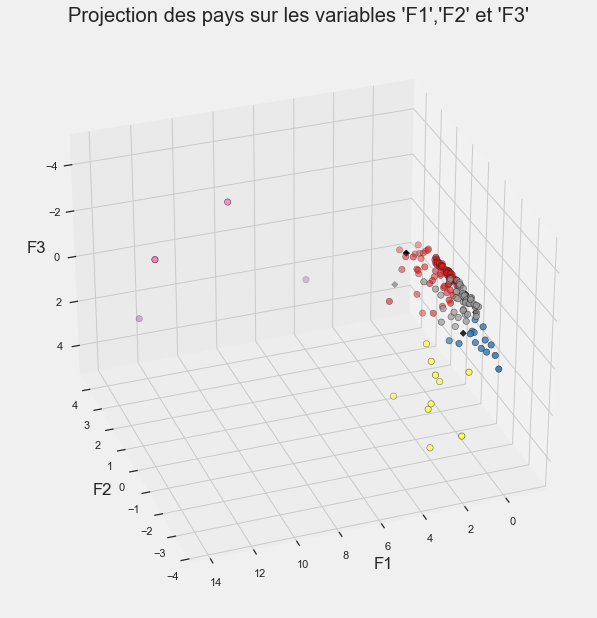

In [77]:
# On peut faire des graphiques à 3 dimensions dans l'espace synthétique : 

# On définit notre figure et notre axe différemment : 
fig= plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
plt.title("Projection des pays sur les variables 'F1','F2' et 'F3'")

# On affiche nos points : 
ax.scatter(
    X_proj.iloc[:, 0],
    X_proj.iloc[:, 1],
    X_proj.iloc[:, 2],
    c=labels, cmap="Set1", edgecolor="k", s=40)

# On affiche nos centroides, avec une couleur noire (c="black") et une frome de losange (marker="D") : 
ax.scatter(
    centroids_proj.iloc[:, 0], 
    centroids_proj.iloc[:, 1],
    centroids_proj.iloc[:, 2],
    marker="D", c="black" )

# On spécifie le nom des axes : 
ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3")
plt.show()

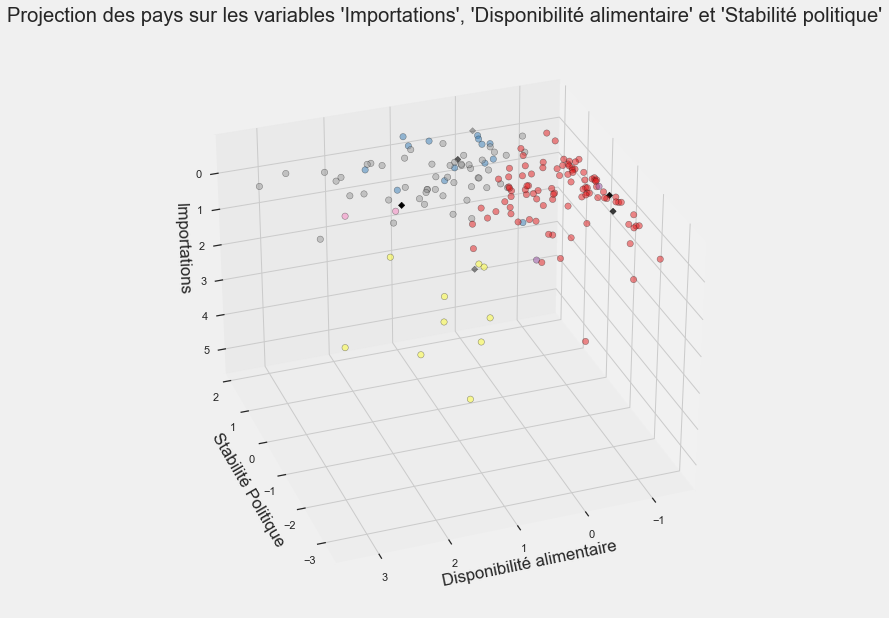

In [78]:
# Ou dans l'espace originel :

# On définit notre figure et notre axe différemment : 
fig= plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
plt.title("Projection des pays sur les variables 'Importations', 'Disponibilité alimentaire' et 'Stabilité politique'")

# On affiche nos points : 
ax.scatter(
    df_X_scaled.iloc[:, 0],
    df_X_scaled.iloc[:, 7],
    df_X_scaled.iloc[:, 3],
    c=labels, cmap="Set1", edgecolor="k", s=40, alpha =0.5)

ax.scatter(centroids_projection.iloc[:, 0], centroids_projection.iloc[:, 7], centroids_projection.iloc[:, 3], marker="D", c="black" )

# On spécifie le nom des axes : 
ax.set_xlabel("Disponibilité alimentaire")
ax.set_ylabel("Stabilité Politique")
ax.set_zlabel("Importations")
plt.show()